In [333]:
import os, sys, glob, traceback
import numpy as np
import scipy.signal as sigpro
import scipy.linalg as scpla
import datetime as dt
from pprint import pprint

from tqdm.notebook import tqdm
import math
import string, copy

import heapq
from collections import defaultdict
import itertools
from functools import lru_cache



%matplotlib notebook
import matplotlib.pyplot as plt

In [334]:
def dprint(dbg, *args, **kwargs):
    if dbg>=lvl:
        print(*args, **kwargs)

In [22]:
### Problem 1

txtin = ['1000',
    '2000',
    '3000',
    '',
    '4000',
    '',
    '5000',
    '6000',
    '',
    '7000',
    '8000',
    '9000',
    '',
    '10000']

with open('p01_input.txt', 'r') as fid:
    ptvals = fid.readlines()
#print(ptvals)

def ptext(txtin):
    txtvals = [{'tot':0, 'vals':[]}]
    for ln in txtin:
        if '\n' in ln:
            ln = ln.replace('\n', '')
        if ln == '':
            txtvals.append({'tot':0, 'vals':[]})
        else:
            v = int(ln)
            txtvals[-1]['tot'] += v
            txtvals[-1]['vals'].append(v)
    vv = np.array([v['tot'] for v in txtvals])
    vs = np.sort(vv)
    vi = np.argsort(vv)
    print('Max {} for elf {}, top 3 elves have {}'.format(vs[-1], 1+vi[-1], np.sum(vs[-3:])))
    
    return txtvals

vo = ptext(txtin)
vo = ptext(ptvals)


Max 24000 for elf 4, top 3 elves have 45000
Max 74198 for elf 209, top 3 elves have 209914


In [28]:
### Problem 2

txtin = ['A Y',
            'B X',
            'C Z']

with open('p02_input.txt', 'r') as fid:
    ptvals = fid.readlines()
    
def p2scoreit(txvals):
    scr = {'rock': 1, 'paper':2, 'scissors':3}
    emap = {'A':'rock', 'B':'paper', 'C':'scissors'}
    mmap = {'X':'rock', 'Y':'paper', 'Z':'scissors'}
    
    wins = ['rs','pr','sp']
    
    wscr = [0, 3, 6]
    totscr = 0
    for ln in txvals:
        ln = ln.replace('\n','')
        thisround = mmap[ln[-1]][0]+emap[ln[0]][0]
        thisscore = scr[mmap[ln[-1]]]
        if thisround in wins:
            thisscore += 6
        elif thisround[0] == thisround[-1]:
            thisscore += 3
        #print(thisround, thisscore)
        totscr += thisscore
    return totscr

def p2bscoreit(txvals):
    scr = {'r': 1, 'p':2, 's':3}
    emap = {'A':'r', 'B':'p', 'C':'s'}
    mmap = {'X':'lose', 'Y':'draw', 'Z':'win'}
    
    wins = ['rs','pr','sp']
    
    plays = {'win':{'r':'p', 'p':'s', 's':'r'},
             'draw':{'r':'r', 'p':'p', 's':'s'},
             'lose':{'r':'s', 'p':'r', 's':'p'}}
    
    wscr = [0, 3, 6]
    totscr = 0
    for ln in txvals:
        ln = ln.replace('\n','')
        thisround = plays[mmap[ln[-1]]][emap[ln[0]]] + emap[ln[0]]
        thisscore = scr[thisround[0]]
        if thisround in wins:
            thisscore += 6
        elif thisround[0] == thisround[-1]:
            thisscore += 3
        #print(thisround, thisscore)
        totscr += thisscore
    return totscr

print(p2scoreit(ptvals))
print(p2bscoreit(ptvals))
        


11603
12725


In [32]:
### Problem 3

import string


txtin = ['vJrwpWtwJgWrhcsFMMfFFhFp',
        'jqHRNqRjqzjGDLGLrsFMfFZSrLrFZsSL',
        'PmmdzqPrVvPwwTWBwg',
        'wMqvLMZHhHMvwLHjbvcjnnSBnvTQFn',
        'ttgJtRGJQctTZtZT',
        'CrZsJsPPZsGzwwsLwLmpwMDw']

with open('p03_input.txt', 'r') as fid:
    ptvals = fid.readlines()
def get_pri(textin):
    pri = {}
    p = 0
    for char in string.ascii_lowercase:
        p+=1
        pri[char] = p
    for char in string.ascii_uppercase:
        p+=1
        pri[char] = p
    pscore=0
    for ln in textin:
        ln = ln.replace('\n', '')
        N = len(ln)
        for ii in range(N//2):
            if ln[ii] in ln[N//2:]:
                pscore += pri[ln[ii]]
                break
    print('Score = {}'.format(pscore))
    
def get_badge_pri(textin):
    pri = {}
    p = 0
    for char in string.ascii_lowercase:
        p+=1
        pri[char] = p
    for char in string.ascii_uppercase:
        p+=1
        pri[char] = p
    pscore=0
    for lnx in range(len(textin)//3):
        ln = textin[3*lnx].replace('\n', '')
        N = len(ln)
        for ii in range(N):
            if ln[ii] in textin[3*lnx+1] and ln[ii] in textin[3*lnx+2]:
                pscore += pri[ln[ii]]
                break
    print('Score = {}'.format(pscore))
get_pri(txtin)
get_pri(ptvals)

get_badge_pri(txtin)
get_badge_pri(ptvals)

Score = 157
Score = 7428
Score = 70
Score = 2650


In [39]:



txtin = ['2-4,6-8',
        '2-3,4-5',
        '5-7,7-9',
        '2-8,3-7',
        '6-6,4-6',
        '2-6,4-8']

with open('p04_input.txt', 'r') as fid:
    ptvals = fid.readlines()
    
def count_overlap_pairs(textvals):
    ctp = 0
    ctq = 0
    
    for ln in textvals:
        ln = ln.replace('\n', '')
        
        lnsplt = ln.split(',')
        lna = lnsplt[0].split('-')
        #print(lna)
        lnb = lnsplt[1].split('-')
        #print(lnb)
        r1 = [int(lna[0]), int(lna[1])]
        r2 = [int(lnb[0]), int(lnb[1])]
        
        if (r1[0]>=r2[0] and r1[1]<=r2[1]) or (r2[0]>=r1[0] and r2[1]<=r1[1]):
            ctp += 1
            
        if (r1[0]>=r2[0] and r1[0]<=r2[1]) or (r2[0]>=r1[0] and r2[0]<=r1[1]):
            ctq += 1
    print('{} full overlapping pairs'.format(ctp))
    
    print('{} partial overlapping pairs'.format(ctq))
count_overlap_pairs(txtin)
count_overlap_pairs(ptvals)
        



2 full overlapping pairs
4 partial overlapping pairs
500 full overlapping pairs
815 partial overlapping pairs


In [160]:
txtin = ['    [D]    ',
         '[N] [C]    ',
         '[Z] [M] [P]',
         ' 1   2   3 ',
         '',
         'move 1 from 2 to 1',
         'move 3 from 1 to 3',
         'move 2 from 2 to 1',
         'move 1 from 1 to 2']

with open('p05_input.txt', 'r') as fid:
    ptvals = fid.readlines()

dbg = 0

def restack(textin):
    #read the current stacks
    
    stacks = True
    cstk = []
    for ln in textin:
        ln = ln.replace('\n', '')
        dprint(1,ln)
        if len(ln) == 0:
            stacks = False
            dprint(1,cstk)
            continue
        if stacks:
            if len(cstk) == 0:
                numstacks = (1+len(ln))//4
                for ii in range(numstacks):
                    cstk.append('')
            for ii in range(numstacks):
                iu = 4*ii+1
                if ln[iu] == '1':
                    break
                if ln[iu] != ' ':
                    cstk[ii] = cstk[ii]+ln[iu]
        else:
            #dprint(c1,stk)
            num2move = int(ln.split(' ')[1])
            mvfrom = int(ln.split(' ')[3])
            mvto = int(ln.split(' ')[5])
            for ii in range(num2move):
                cstk[mvto-1] = cstk[mvfrom-1][0] + cstk[mvto-1]
                cstk[mvfrom-1] = cstk[mvfrom-1][1:]
            dprint(1,cstk)
            dprint(1,'=='*30)
    for stk in cstk:
        print(stk[0], end='')
    print()
def restack9001(textin):
    #read the current stacks
    
    stacks = True
    cstk = []
    for ln in textin:
        ln = ln.replace('\n', '')
        dprint(1,ln)
        if len(ln) == 0:
            stacks = False
            dprint(1,cstk)
            continue
        if stacks:
            if len(cstk) == 0:
                numstacks = (1+len(ln))//4
                for ii in range(numstacks):
                    cstk.append('')
            for ii in range(numstacks):
                iu = 4*ii+1
                if ln[iu] == '1':
                    break
                if ln[iu] != ' ':
                    cstk[ii] = cstk[ii]+ln[iu]
        else:
            #print(cstk)
            num2move = int(ln.split(' ')[1])
            mvfrom = int(ln.split(' ')[3])
            mvto = int(ln.split(' ')[5])
            
            cstk[mvto-1] = cstk[mvfrom-1][:num2move] + cstk[mvto-1]
            cstk[mvfrom-1] = cstk[mvfrom-1][num2move:]
            dprint(1,cstk)
            dprint(1,'=='*30)
    for stk in cstk:
        print(stk[0], end='')
    print()            
    
restack(txtin)
restack(ptvals)

restack9001(txtin)
restack9001(ptvals)

    
    

CMZ
QMBMJDFTD
MCD
NBTVTJNFJ


In [161]:
txtin = ['mjqjpqmgbljsphdztnvjfqwrcgsmlb',# seven
         'bvwbjplbgvbhsrlpgdmjqwftvncz',#: first marker after character 5
         'nppdvjthqldpwncqszvftbrmjlhg', #: first marker after character 6
         'nznrnfrfntjfmvfwmzdfjlvtqnbhcprsg', #: first marker after character 10
         'zcfzfwzzqfrljwzlrfnpqdbhtmscgvjw'] #: first marker after character 11',

with open('p06_input.txt', 'r') as fid:
    ptvals = fid.readlines()
#print(ptvals)
def find_marker(textin):
    txu = textin.replace('\n','')
    tused = ''
    gct = 0
    for itx, t in enumerate(txu):
        if itx>=3:
            tused = t
            for tt in txu[itx-1:itx-4:-1]:
                if not tt in tused:
                    tused = tused+tt
            if len(tused) == 4:
                #print(txu[:itx+1])
                #print('{} + {}'.format(txu[itx-3:itx], t))
                print('Marker at {}'.format(itx+1))
                break
def find_fmarker(textin):
    txu = textin.replace('\n','')
    tused = ''
    gct = 0
    for itx, t in enumerate(txu):
        if itx>=13:
            tused = t
            for tt in txu[itx-1:itx-14:-1]:
                if not tt in tused:
                    tused = tused+tt
            if len(tused) == 14:
                #print(txu[:itx+1])
                #print('{} + {}'.format(txu[itx-3:itx], t))
                print('Marker at {}'.format(itx+1))
                break
dbg = 100
for tcheck in txtin:
    find_marker(tcheck)

find_marker(ptvals[0])

find_fmarker(ptvals[0])

Marker at 7
Marker at 5
Marker at 6
Marker at 10
Marker at 11
Marker at 1625
Marker at 2250


In [121]:
txtin = ['$ cd /',
        '$ ls',
        'dir a',
        '14848514 b.txt',
        '8504156 c.dat',
        'dir d',
        '$ cd a',
        '$ ls',
        'dir e',
        '29116 f',
        '2557 g',
        '62596 h.lst',
        '$ cd e',
        '$ ls',
        '584 i',
        '$ cd ..',
        '$ cd ..',
        '$ cd d',
        '$ ls',
        '4060174 j',
        '8033020 d.log',
        '5626152 d.ext',
        '7214296 k']

with open('p07_input.txt', 'r') as fid:
    ptvals = fid.readlines()

def get_dir_info(textin):
    ds = {}
    cwd = None
    mxlvl = 0
    
    for ln in textin:
        ln = ln.replace('\n','')
        if ln.startswith('$ '):
            # print(ln)
            lncmd = ln.split(' ')
            if lncmd[1] == 'cd':
                if lncmd[-1] == '..':
                    owd = cwd
                    cwd = ds[cwd]['parent']
                    ds[cwd]['size'] += ds[owd]['size']
                    lvl -= 1
                elif lncmd[-1] == '/':
                    cwd = lncmd[-1]
                    ds[cwd] = {'parent':None, 'level':0, 'size':0, 'files':[], 'children':[]}
                    lvl = 0
                else:
                    lvl += 1
                    owd = cwd
                    if owd is None:
                        cwd = lncmd[-1]
                    else:
                        cwd = owd+'-'+lncmd[-1]
                    if cwd in ds.keys():
                        print('We seem to be revisiting')
                    else:
                        ds[cwd] = {'parent':owd, 'level':ds[owd]['level']+1, 'size':0, 'files':[], 'children':[]}
                        if ds[cwd]['level'] > mxlvl:
                            mxlvl = ds[cwd]['level']
            else:
                ajnk = 0
                #print('Doing an ls {} in {}'.format(lncmd[-1], cwd))
        else:
            lninfo = ln.split(' ')
            if lninfo[0].startswith('dir'):
                ds[cwd]['children'].append(lninfo[-1])
            else:
                sz = int(lninfo[0])
                ds[cwd]['files'].append({'size':sz, 'name':lninfo[-1]})
                ds[cwd]['size'] += sz
    while lvl > 0:
        owd = cwd
        cwd = ds[cwd]['parent']
        ds[cwd]['size'] += ds[owd]['size']
        lvl -= 1
        
    
    
    allsize = 0    
    for ky in ds.keys():
        if ds[ky]['size'] < 100000:
            allsize += ds[ky]['size']
    print('{} total in directories less the 100K'.format(allsize))
    # print(ds)  
    # find the best directory to delete
    
    totsize = ds['/']['size']
    ktarget = totsize - (70000000-30000000)
    
    ktc = 5000*ktarget
    print(totsize,ktarget, ktc)
    
    for ky in ds.keys():
        if ds[ky]['size'] >= ktarget:
            
            if ds[ky]['size'] < ktc:
                ktc = ds[ky]['size']
    print('Need to delete: {}'.format(ktc))
            
            
        
        
        
get_dir_info(txtin)
print(txtin)    
#print(ptvals)
print('- '*30)
get_dir_info(ptvals)

95437 total in directories less the 100K
48381165 8381165 41905825000
Need to delete: 24933642
['$ cd /', '$ ls', 'dir a', '14848514 b.txt', '8504156 c.dat', 'dir d', '$ cd a', '$ ls', 'dir e', '29116 f', '2557 g', '62596 h.lst', '$ cd e', '$ ls', '584 i', '$ cd ..', '$ cd ..', '$ cd d', '$ ls', '4060174 j', '8033020 d.log', '5626152 d.ext', '7214296 k']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
1555642 total in directories less the 100K
45349983 5349983 26749915000
Need to delete: 5974547


In [163]:
txtin = ['30373',
         '25512',
         '65332',
         '33549',
         '35390']

with open('p08_input.txt', 'r') as fid:
    ptvals = fid.readlines()
    
def vmap(textin):
    nrows = len(textin)
    ln0 = textin[0].replace('\n','')
    ncols = len(ln0)
    themap = np.zeros((nrows, ncols), dtype = 'int')
    #convert the text to a grid
    for lnx, ln in enumerate(textin):
        ln = ln.replace('\n', '')
        for ic, ltr in enumerate(ln):
            themap[lnx, ic] = int(ltr, base=10)
            
    vmap = np.zeros((nrows, ncols), dtype = 'int')
    for ir in range(nrows):
        for ic in range(ncols):
            if ir == 0 or ir == nrows-1 or ic == 0 or ic == ncols-1:
                vmap[ir, ic] = 1
            elif all(themap[ir, ic] > themap[:ir, ic]):
                vmap[ir, ic] = 1
            elif all(themap[ir, ic] > themap[ir, :ic]):
                vmap[ir, ic] = 1
            elif all(themap[ir, ic] > themap[ir+1:, ic]):
                vmap[ir, ic] = 1
            elif all(themap[ir, ic] > themap[ir, ic+1:]):
                vmap[ir, ic] = 1
            
    print('Total visible {}'.format(np.sum(vmap)))
    vmap2 = np.zeros((nrows, ncols), dtype = 'int')
    for ir in range(nrows):
        for ic in range(ncols):
            visleft = 0
            visright = 0
            visup = 0
            visdown = 0
            for ii in range(ic-1, -1, -1):
                visleft += 1
                if themap[ir, ii] >= themap[ir,ic]:
                    break
            for ii in range(ic+1, ncols):
                visright += 1
                if themap[ir, ii] >= themap[ir,ic]:
                    break
            for ii in range(ir-1, -1, -1):
                visup += 1
                if themap[ii, ic] >= themap[ir,ic]:
                    break
            for ii in range(ir+1, nrows):
                visdown += 1
                if themap[ii, ic] >= themap[ir,ic]:
                    break
            
            #print('{},{}, left {}, right {}, up {}, down {}, prod={}'.format(ir, ic, visleft, visright, visup, visdown,
            #                                                       visleft*visright*visup*visdown))
            vmap2[ir,ic] = visleft * visright * visup * visdown
    print('Best tree viewing site has {} trees visible'.format(vmap2.max()))
    
                
    
            
    #_=plt.figure()
    #_=plt.imshow(vmap)

vmap(txtin)

vmap(ptvals)


Total visible 21
Best tree viewing site has 8 trees visible
Total visible 1538
Best tree viewing site has 496125 trees visible


In [168]:
txtin = ['R 4',
        'U 4',
        'L 3',
        'D 1',
        'R 4',
        'D 1',
        'L 5',
        'R 2']

with open('p09_input.txt', 'r') as fid:
    ptvals = fid.readlines()

dbg = 1
def ropesim(textin, numknots=2):
    headgrid = np.zeros((2000, 2000), dtype = 'int')
    tailgrid = np.zeros((2000, 2000), dtype = 'int')
    hpos = np.zeros((numknots, 2), dtype='int')
    headgrid[hpos[0,0], hpos[0,1]] += 1
    tailgrid[hpos[-1, 0], hpos[-1, 1]] += 1
    hsteps = {'U':np.array([1,0]),
              'D':np.array([-1,0]),
              'R':np.array([0,1]),
              'L':np.array([0,-1])}
    
    for ln in textin:
        ln = ln.replace('\n', '')
        dvs = ln.split(' ')
        for ii in range(int(dvs[1])):
            hpos[0,:] += hsteps[dvs[0]]
            for ik in range(1, numknots):
                htdiff = hpos[ik-1,:] - hpos[ik,:]
                hta = np.abs(htdiff)
                hta[hta==0]=1
                if any(hta>1):
                    hpos[ik,:] += htdiff//hta
                
            
            headgrid[hpos[0,0], hpos[0,1]] += 1
            tailgrid[hpos[-1, 0], hpos[-1, 1]] += 1
            #headgrid[hpos[0], hpos[1]] += 1
            #tailgrid[tpos[0], tpos[1]] += 1
    #_=plt.figure()
    #_=plt.imshow(headgrid)
    #_=plt.figure()
    #_=plt.imshow(tailgrid)
    
    dprint(1, 'Number of grid elements the tail gets into {}'.format(np.sum(tailgrid>0)))
ropesim(txtin)

ropesim(ptvals)

txty2 = ['R 5', 'U 8', 'L 8', 'D 3', 'R 17', 'D 10', 'L 25', 'U 20']

ropesim(txty2, numknots=10)
ropesim(ptvals, numknots=10)

ropesim(ptvals, numknots=100)


Number of grid elements the tail gets into 13
Number of grid elements the tail gets into 6212
Number of grid elements the tail gets into 36
Number of grid elements the tail gets into 2522
Number of grid elements the tail gets into 333


The sum is 13140print(x)
[[1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0
  1 1 0 0]
 [1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0
  1 1 1 0]
 [1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1
  0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0
  0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0
  1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0
  0 0 0 0]]


<IPython.core.display.Javascript object>


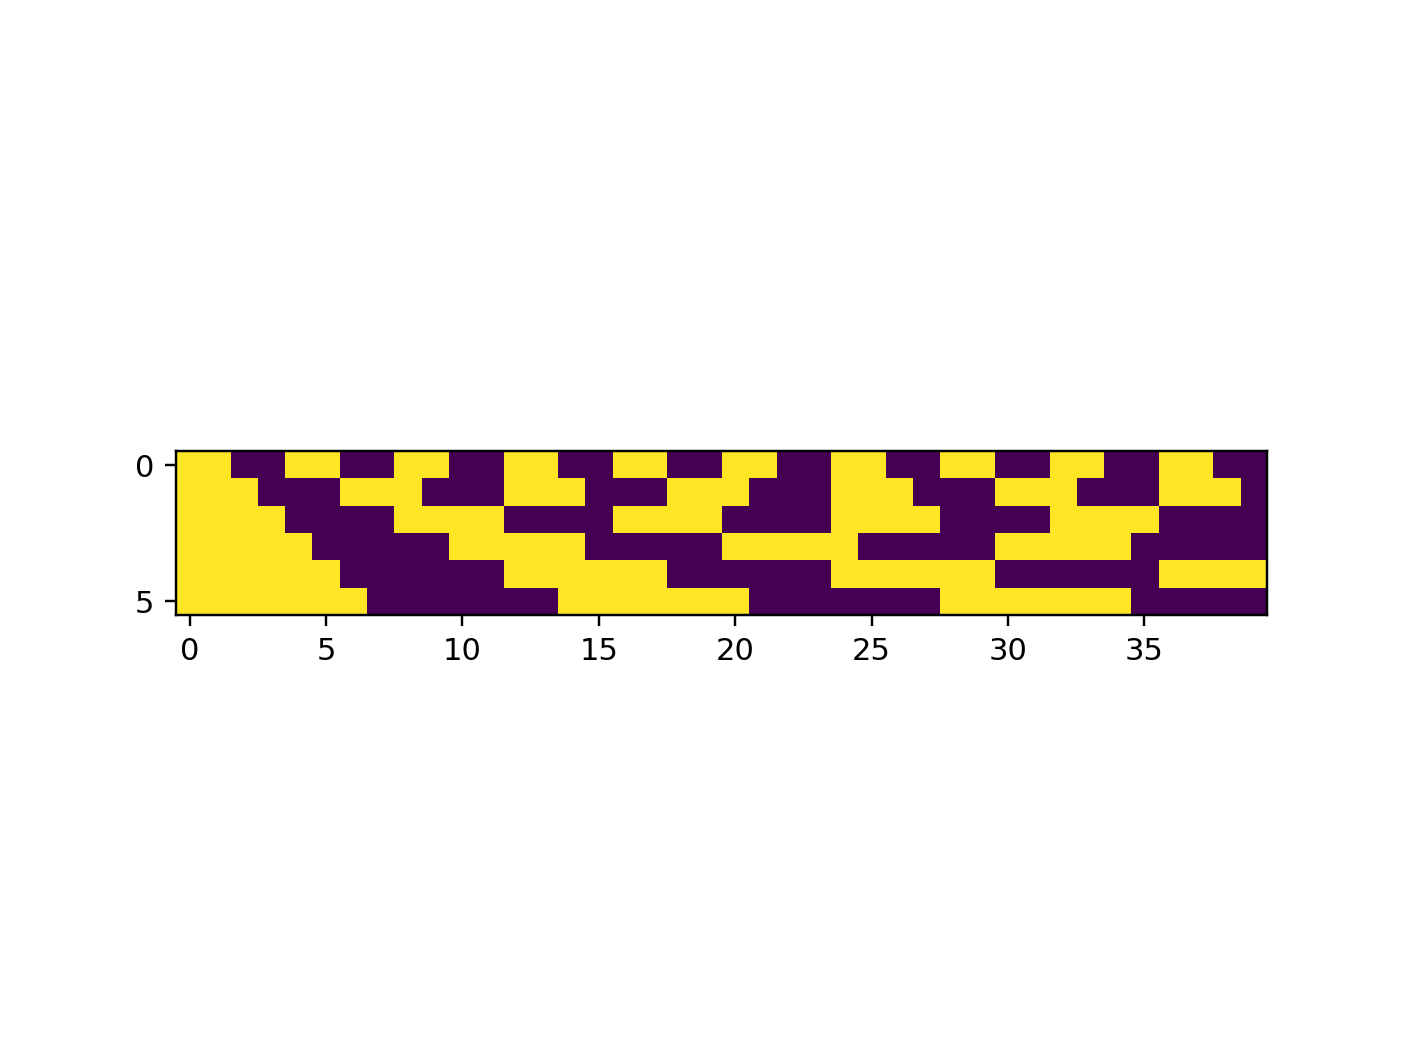

The sum is 14320print(x)
[[1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0
  0 1 1 0]
 [1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0
  0 0 1 0]
 [1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0
  0 0 1 0]
 [1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0
  0 0 1 0]
 [1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
  0 0 1 0]
 [1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
  1 1 0 0]]


<IPython.core.display.Javascript object>


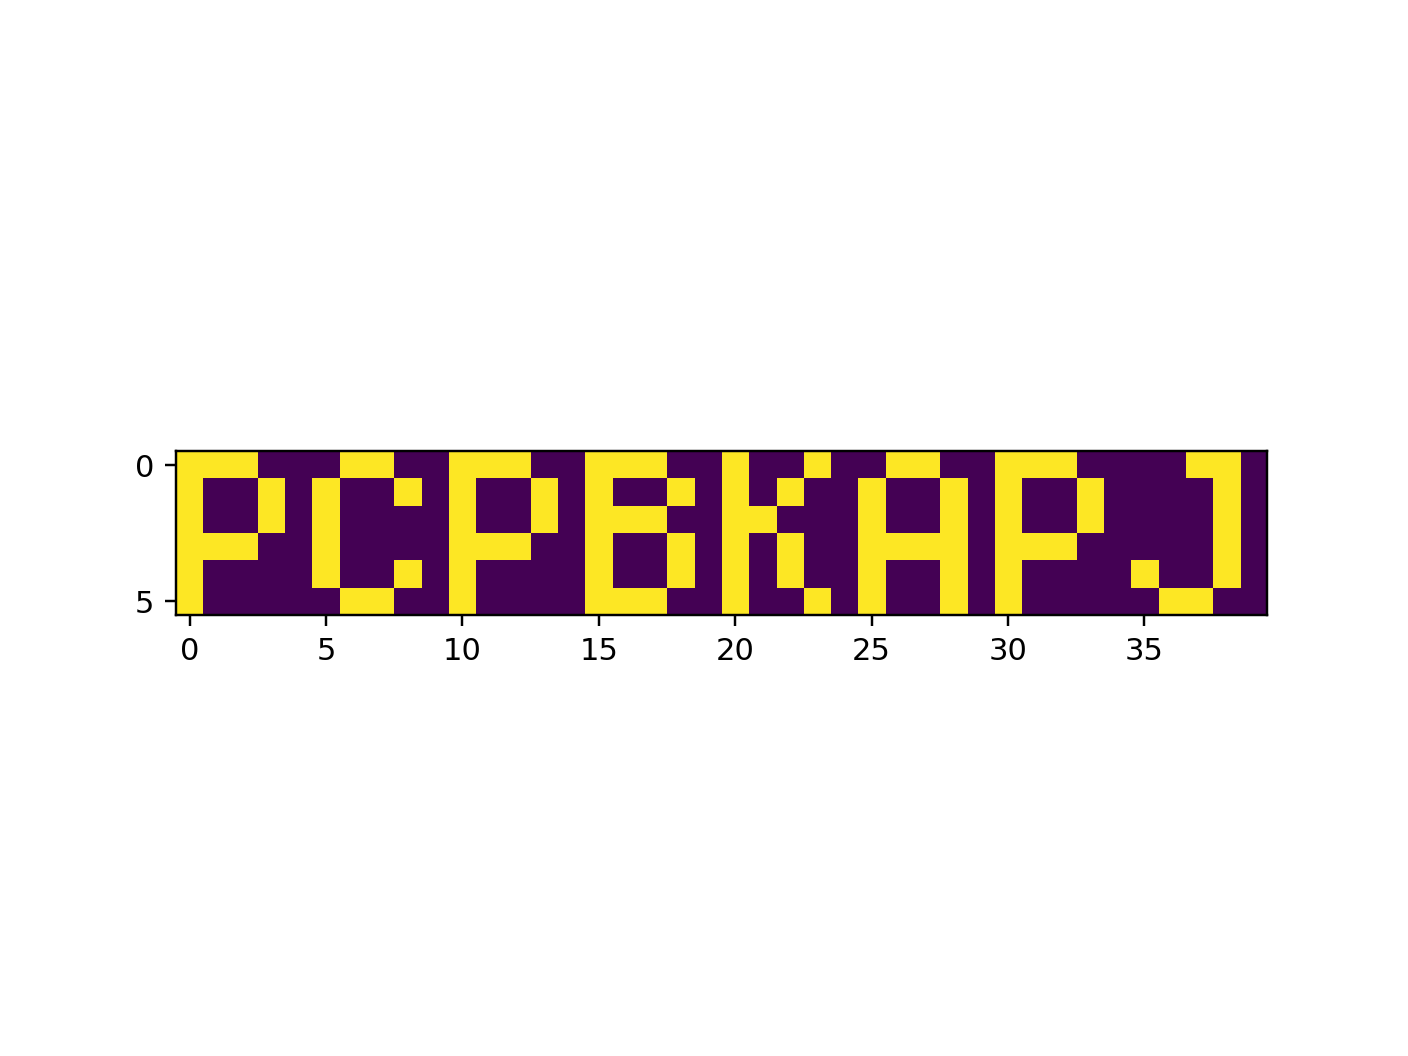

In [207]:
txtin = '''noop
addx 3
addx -5'''

txt2 ='''addx 15
addx -11
addx 6
addx -3
addx 5
addx -1
addx -8
addx 13
addx 4
noop
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx -35
addx 1
addx 24
addx -19
addx 1
addx 16
addx -11
noop
noop
addx 21
addx -15
noop
noop
addx -3
addx 9
addx 1
addx -3
addx 8
addx 1
addx 5
noop
noop
noop
noop
noop
addx -36
noop
addx 1
addx 7
noop
noop
noop
addx 2
addx 6
noop
noop
noop
noop
noop
addx 1
noop
noop
addx 7
addx 1
noop
addx -13
addx 13
addx 7
noop
addx 1
addx -33
noop
noop
noop
addx 2
noop
noop
noop
addx 8
noop
addx -1
addx 2
addx 1
noop
addx 17
addx -9
addx 1
addx 1
addx -3
addx 11
noop
noop
addx 1
noop
addx 1
noop
noop
addx -13
addx -19
addx 1
addx 3
addx 26
addx -30
addx 12
addx -1
addx 3
addx 1
noop
noop
noop
addx -9
addx 18
addx 1
addx 2
noop
noop
addx 9
noop
noop
noop
addx -1
addx 2
addx -37
addx 1
addx 3
noop
addx 15
addx -21
addx 22
addx -6
addx 1
noop
addx 2
addx 1
noop
addx -10
noop
noop
addx 20
addx 1
addx 2
addx 2
addx -6
addx -11
noop
noop
noop'''


with open('p10_input.txt', 'r') as fid:
    ptvals = fid.read()
    
dbg = 5
def program_1(textin):
    sumat = np.array([20, 60, 100, 140, 180, 220])
    x = [1]
    dprint(10, textin)
    for ln in textin:
        dprint(10, ln)
        if len(ln) <4:
            continue
        if ln == 'noop':
            x.append(x[-1])
        else:
            x.append(x[-1])
            x.append(x[-1]+int(ln.split(' ')[-1], base=10))
    x = np.array(x)
    x = x[:40*(len(x)//40)]
    
    #print(x)
    print('The sum is {}print(x)'.format(np.sum(sumat*x[sumat-1])))
    
    xx = x.reshape(-1,40)# - np.atleast_2d(np.arange(2, 42))
    
    #xim = np.zeros_like(xx)
    xa = np.zeros_like(x)
    for ii in range(len(x)):
        xa[ii] = (x[ii] >= (ii%40-1)) * (x[ii] < (ii%40+2))
    xx = xa[:40*(len(x)//40)].reshape(-1,40)# - np.atleast_2d(np.arange(2, 42))
    print(xx)
    _=plt.figure()
    _=plt.imshow(xx[:40*(len(x)//40)].reshape(-1, 40))
    
# print(txtin.split('\n'))



program_1(txt2.split('\n'))

program_1(ptvals.split('\n'))

In [248]:
txtin = """Monkey 0:
Starting items: 79, 98
Operation: new = old * 19
Test: divisible by 23
If true: throw to monkey 2
If false: throw to monkey 3

Monkey 1:
Starting items: 54, 65, 75, 74
Operation: new = old + 6
Test: divisible by 19
If true: throw to monkey 2
If false: throw to monkey 0

Monkey 2:
Starting items: 79, 60, 97
Operation: new = old * old
Test: divisible by 13
If true: throw to monkey 1
If false: throw to monkey 3

Monkey 3:
Starting items: 74
Operation: new = old + 3
Test: divisible by 17
If true: throw to monkey 0
If false: throw to monkey 1"""

with open('p11_input.txt', 'r') as fid:
    ptvals = fid.read()
dbg=4
def monkey_business(textin, worry_discount=3, numrounds = 20):
    monkey_see = {}
    
    for lnx in range(0, len(textin), 7):
        dprint(5, textin[lnx])
        lhs, rhs = textin[lnx+2].replace('Operation: ', '').split('=')
        
           
            
            
        
        monkey_see[textin[lnx].replace(' ','_').replace(':', '')] = {
            'ct':0,
            'items':[int(a) for a in textin[lnx+1].split(': ')[-1].split(',')],
            'func':rhs.replace(' ',''),
            'mod':int(textin[lnx+3].split('by ')[-1]),
            'next':[textin[lnx+4].split('throw to ')[-1].replace('m','M').replace(' ','_'), 
                    textin[lnx+5].split('throw to ')[-1].replace('m','M').replace(' ','_')]}
    wm = 1
    for ky in monkey_see.keys():
        wm *= monkey_see[ky]['mod']
        dprint(1, '{} has {}'.format(ky, monkey_see[ky]['items']))
    for iround in range(numrounds):
        for ky in monkey_see.keys():
            thislist = monkey_see[ky]['items']
            monkey_see[ky]['items'] = []
            for old in thislist:
                monkey_see[ky]['ct'] += 1
                newworry = eval(monkey_see[ky]['func'])
                nw2 = newworry//worry_discount
                nx = int(nw2%monkey_see[ky]['mod'] > 0)
                monkey_see[monkey_see[ky]['next'][nx]]['items'].append(nw2%wm)
                dprint(9,'{} {} -> {} mod {} goes to {} at {}'.format(
                    ky, old, newworry, nw2%monkey_see[ky]['mod'], monkey_see[ky]['next'][nx], nw2))
    mb = []
    for ky in monkey_see.keys():
        dprint(1, '{} mb = {} has {}'.format(ky, monkey_see[ky]['ct'], monkey_see[ky]['items']))
        mb.append(monkey_see[ky]['ct'])
    mb = np.sort(np.array(mb))
    print(mb)
    print('Total Monkey Business {}'.format(mb[-2]*mb[-1]))
        
#print(txtin.split('\n'))
#print(ptvals.split('\n'))

monkey_business(txtin.split('\n'))
monkey_business(ptvals.split('\n'))


monkey_business(txtin.split('\n'), worry_discount=1, numrounds = 10000)
monkey_business(ptvals.split('\n'), worry_discount=1, numrounds = 10000)

Monkey_0 has [79, 98]
Monkey_1 has [54, 65, 75, 74]
Monkey_2 has [79, 60, 97]
Monkey_3 has [74]
Monkey_0 mb = 101 has [10, 12, 14, 26, 34]
Monkey_1 mb = 95 has [245, 93, 53, 199, 115]
Monkey_2 mb = 7 has []
Monkey_3 mb = 105 has []
[  7  95 101 105]
Total Monkey Business 10605
Monkey_0 has [98, 70, 75, 80, 84, 89, 55, 98]
Monkey_1 has [59]
Monkey_2 has [77, 95, 54, 65, 89]
Monkey_3 has [71, 64, 75]
Monkey_4 has [74, 55, 87, 98]
Monkey_5 has [90, 98, 85, 52, 91, 60]
Monkey_6 has [99, 51]
Monkey_7 has [98, 94, 59, 76, 51, 65, 75]
Monkey_0 mb = 36 has []
Monkey_1 mb = 26 has []
Monkey_2 mb = 227 has [24, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Monkey_3 mb = 63 has [38, 38]
Monkey_4 mb = 239 has [58, 3, 3, 3, 3, 3]
Monkey_5 mb = 223 has []
Monkey_6 mb = 184 has [5, 5, 5, 5, 5, 5, 5, 5, 5]
Monkey_7 mb = 221 has []
[ 26  36  63 184 221 223 227 239]
Total Monkey Business 54253
Monkey_0 has [79, 98]
Monkey_1 has [54, 65, 75, 74]
Monkey_2 has [79, 60, 97]
Monkey_3 has [74]
Monkey_

In [267]:
(0,1) == (1,1)

False

In [325]:
# %%time
%matplotlib notebook

txtin = """Sabqponm
abcryxxl
accszExk
acctuvwj
abdefghi""".split('\n')

with open('p12_input.txt', 'r') as fid:
    ptvals = fid.read().strip().split('\n')
    
amap = {}

for ht, ltr in enumerate(string.ascii_lowercase):
    amap[ltr] = ht


def gen_map(textin):
    n = len(textin)
    m = len(textin[0])

    cpth = np.zeros((n,m), dtype='int')
    for pln, ln in enumerate(textin):
        for plm, l in enumerate(ln):
            if l == 'S':
                startpoint = (pln, plm)
                cpth[pln, plm] = amap['a']
            elif l == 'E':
                endpoint = (pln, plm)
                cpth[pln, plm] = amap['z']
            else:
                cpth[pln, plm] = amap[l]
    return cpth, startpoint, endpoint

    
    
    

print(len(txtin), len(txtin[0]))
print(len(ptvals), len(ptvals[0]))



def find_route(htmap, pst, pnd):
    
    n,m = htmap.shape
    # print(n,m)
    nxtpnt = [(0,1),(1,0),(0,-1),(-1,0)]
    path_hash = defaultdict(lambda: False)
    path_hash[pst] = 0
    paths = []
    other_z = []
    ct = 0
    heapq.heappush(paths, 
                   (0, 0, 0, {'pts':[pst], 'cost':0, 'done':False}))
    heapq.heappush(paths, 
                   ((n*m)**2, ct, (n*m)**2, {'pts':[(-10, -10)], 'cost':m*n, 'done':False}))
    #print('preloaded paths')
    #for ii in range(2):
    #    print(paths[ii][0], paths[ii][3]['pts'])
    hcost = [1, n*m]
    dct = 0
    while True:
        if len(paths) == 0:
            paths = [None]
            break
        
        current_steps, _, _, pth = heapq.heappop(paths)
        lastpt = pth['pts'][-1]
        # print(pth)
        lastht = htmap[lastpt[0], lastpt[1]]
        for pnt in nxtpnt:
            ct+=1
            thispt = (pnt[0]+lastpt[0], pnt[1]+lastpt[1])
            possdone = False
            if thispt[0] > -1 and thispt[1] > -1 and thispt[0]<n and thispt[1] < m:
                thisht = htmap[thispt[0], thispt[1]]
            
                
                steps = current_steps+hcost[int(thisht-lastht>1)]
                heur = abs(pnd[0]-thispt[0]) + abs(pnd[1]-thispt[1])
            
                #print('ev pt {} height {}, steps {}'.format(thispt, thisht, steps))

                possdone = (steps<n*m) and thispt==pnd
                if not path_hash[thispt]:
                    path_hash[thispt] = steps
                    ptho = pth['pts'].copy()
                    ptho.append(thispt)
                    heapq.heappush(paths, 
                       (steps, heur, ct, {'pts':ptho, 'cost':0, 'done':possdone}))
                elif steps < path_hash[thispt]:
                    path_hash[thispt] = steps
                    ptho = pth['pts'].copy()
                    ptho.append(thispt)
                    heapq.heappush(paths, 
                       (steps, heur, ct, {'pts':ptho, 'cost':0, 'done':possdone}))
                else:
                    if thispt==pnd:
                        dct += 1
#                 if possdone:
#                     print('x'*36)
#                     print((steps, heur, ct, thispt, possdone))
                #if thisht == 25:
                #    print('-'*36)
                #    print((steps, heur, ct, thispt, possdone))
                    
                    
            if possdone:
                break
        if possdone:
            break
    #print('Final paths')
    #for ii in range(len(paths)):
    #    print(paths[ii])
    return paths[0]


htmap, pst, pnd = gen_map(txtin)
print('Start at {} end at {}'.format(pst, pnd))
# _=plt.figure()
# _=plt.imshow(htmap, origin='lower')
thepath = find_route(htmap, pst, pnd)
print('Start at {} end at {}'.format(pst, pnd))
print('{} steps'.format(thepath[0]))

#for ii in range(len(thepath[3]['pts'])):
#    _=plt.imshow(thepath[3]['pts'][ii][0],thepath[3]['pts'][ii][1], 'w+')

print('='*55)
pl = []
for ir in range(htmap.shape[0]):
    for ic in range(htmap.shape[1]):
        if htmap[ir,ic] == 0:
            
            try:
                thepath = find_route(htmap, (ir, ic), pnd)
                if thepath is None:
                    #print('Didn''t converge')
                    continue
                else:
                    pl.append(thepath[0])
                    print('Start at {} end at {}'.format((ir, ic), pnd))
                    print('{} steps'.format(thepath[0]))
                    
            except Exception as e:
                print('Exception {}'.format(e))
                traceback.print_exc()
                print('Failed')
                raise ValueError
print('minimum is {}'.format(np.array(pl).min()))

print('='*55)
htmap, pst, pnd = gen_map(ptvals)
print('Start at {} end at {}'.format(pst, pnd))
thepath = find_route(htmap, pst, pnd)
print('Start at {} end at {}'.format(pst, pnd))
print('{} steps'.format(thepath[0]))
# _=plt.figure()
# _=plt.imshow(htmap, origin='lower')
print('='*55)
pl = []
for ir in range(htmap.shape[0]):
    for ic in range(htmap.shape[1]):
        if htmap[ir,ic] == 0:
            
            try:
                thepath = find_route(htmap, (ir, ic), pnd)
                if thepath is None:
                    #print('Didn''t converge')
                    continue
                else:
                    pl.append(thepath[0])
                    print('Start at {} end at {}'.format((ir, ic), pnd))
                    print('{} steps'.format(thepath[0]))
                    
            except Exception as e:
                print('Exception {}'.format(e))
                traceback.print_exc()
                print('Failed')
                raise ValueError
print('minimum is {}'.format(np.array(pl).min()))


        
    


5 8
41 143
Start at (0, 0) end at (2, 5)
Start at (0, 0) end at (2, 5)
31 steps
Start at (0, 0) end at (2, 5)
31 steps
Start at (0, 1) end at (2, 5)
30 steps
Start at (1, 0) end at (2, 5)
30 steps
Start at (2, 0) end at (2, 5)
31 steps
Start at (3, 0) end at (2, 5)
30 steps
Start at (4, 0) end at (2, 5)
29 steps
minimum is 29
Start at (20, 0) end at (20, 120)
Start at (20, 0) end at (20, 120)
467 steps
Start at (0, 0) end at (20, 120)
465 steps
Start at (1, 0) end at (20, 120)
464 steps
Start at (2, 0) end at (20, 120)
463 steps
Start at (3, 0) end at (20, 120)
462 steps
Start at (4, 0) end at (20, 120)
461 steps
Start at (5, 0) end at (20, 120)
460 steps
Start at (6, 0) end at (20, 120)
459 steps
Start at (7, 0) end at (20, 120)
460 steps
Start at (8, 0) end at (20, 120)
461 steps
Start at (9, 0) end at (20, 120)
460 steps
Start at (10, 0) end at (20, 120)
459 steps
Start at (11, 0) end at (20, 120)
458 steps
Start at (12, 0) end at (20, 120)
459 steps
Start at (13, 0) end at (20, 120

In [27]:
txtin = """[1,1,3,1,1]
[1,1,5,1,1]

[[1],[2,3,4]]
[[1],4]

[9]
[[8,7,6]]

[[4,4],4,4]
[[4,4],4,4,4]

[7,7,7,7]
[7,7,7]

[]
[3]

[[[]]]
[[]]

[1,[2,[3,[4,[5,6,7]]]],8,9]
[1,[2,[3,[4,[5,6,0]]]],8,9]
""".split('\n')

with open('p13_input.txt', 'r') as fid:
    ptvals = fid.read().strip().split('\n')
dbg = 3

def set_compare(s1, s2):
    l1 = len(s1)
    l2 = len(s2)
    
    dprint(3,s1)
    dprint(3,s2)
    
    dprint(3,'Lengths {}, {}'.format(l1, l2))
    
    if l1 == 0 and l2 > 0:
        dprint(2,l1 == 0, l2 > 0)
        dprint(2,'return 1 True')
        return 1
    elif l2 == 0 and l1 > 0:
        dprint(2,'return 2 False')
        return -1
    
    
    
    good = 0
    if l1 < l2:
        for i1 in range(l1):
            if isinstance(s1[i1], list):
                if isinstance(s2[i1], list):
                    good = set_compare(s1[i1], s2[i1])
                else:
                    good = set_compare(s1[i1], [s2[i1]])
            elif isinstance(s2[i1], list):
                    good = set_compare([s1[i1]], s2[i1])
            elif s1[i1] < s2[i1]:
                dprint(2,'return 3 True')
                return 1
            elif s1[i1] > s2[i1]:
                dprint(2,'return 4 False')
                return -1
            if good != 0:
                dprint(2,'return 5 decided')
                return good
            
        dprint(2, 'return 5b True')
        return 1
    elif l2 < l1:
        for i1 in range(l2):
            if isinstance(s1[i1], list):
                if isinstance(s2[i1], list):
                    good = set_compare(s1[i1], s2[i1])
                else:
                    good = set_compare(s1[i1], [s2[i1]])
            elif isinstance(s2[i1], list):
                    good = set_compare([s1[i1]], s2[i1])
            elif s1[i1] < s2[i1]:
                dprint(2,'return 6 True')
                return 1
            elif s1[i1] > s2[i1]:
                dprint(2,'return 7 False')
                return -1
            if good != 0:
                dprint(2,'return 8 decided')
                return good
        return -1
    else:
        for i1 in range(l1):
            if isinstance(s1[i1], list):
                if isinstance(s2[i1], list):
                    good = set_compare(s1[i1], s2[i1])
                else:
                    good = set_compare(s1[i1], [s2[i1]])
            elif isinstance(s2[i1], list):
                    good = set_compare([s1[i1]], s2[i1])
            elif s1[i1] < s2[i1]:
                dprint(2,'return 9 True')
                return 1
            elif s1[i1] > s2[i1]:
                dprint(2,'return 10 False')
                return -1
            if good != 0:
                dprint(2,'return 11 Decide')
                return good
            
        dprint(2,'return 12 undecided')
        return 0
    dprint(2,'return 13 whatever')
    return good
            
                
    
    
def pkt_reader(textin):
    numlines = len(textin)
    gdidx = 0
    for ilx in range(0,numlines,3):
        set1 = eval(textin[ilx])
        set2 = eval(textin[ilx+1])
        good = set_compare(set1, set2)
        dprint(3,good)
        if good ==1:
            gdidx += ilx//3+1
            dprint(1,'Pair {} is good'.format(ilx//3+1))
            dprint(2,'Set1 {}'.format(set1))
            dprint(2,'Set2 {}'.format(set2))
            
            
        elif good == 0:
            dprint(1,'Pair {} is 0, not done right'.format(ilx//3+1))
        else:
            dprint(1,'Pair {} is 0, bad'.format(ilx//3+1))
        if dbg > 5:
            break
    dprint(0,'Sum of valid indeces {}'.format(gdidx))

def pkt_sort(textin):
    numlines = len(textin)
    gdidx = 0
    
    fulllist = [[[2]],[[6]]]
    
    for ilx in range(0,numlines,3):
        set1 = eval(textin[ilx])
        set2 = eval(textin[ilx+1])
        fulllist.append(set1)
        fulllist.append(set2)
        
    while True:
        change = False
        for ii in range(len(fulllist)-1):
            good = set_compare(fulllist[ii], fulllist[ii+1])
            if good == -1:
                oset = fulllist[ii].copy()
                fulllist[ii] = fulllist[ii+1].copy()
                fulllist[ii+1] = oset.copy()
                change = True
        if not change:
            break
    for ix, ss in enumerate(fulllist):
        if ss == [[2]]:
            iprod = ix+1
        elif ss == [[6]]:
            iprod *= ix+1
        dprint(1, '{} :: {}'.format(ix+1, ss))
    dprint(0,'Product of insert indeces {}'.format(iprod))

    
    
dbg = 0
pkt_reader(txtin)
print('+'*56)
dbg=0
pkt_reader(ptvals)
dbg = 1

pkt_sort(txtin)
pkt_sort(ptvals)





Sum of valid indeces 13
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Sum of valid indeces 6046
1 :: []
2 :: [[]]
3 :: [[[]]]
4 :: [1, 1, 3, 1, 1]
5 :: [1, 1, 5, 1, 1]
6 :: [[1], [2, 3, 4]]
7 :: [1, [2, [3, [4, [5, 6, 0]]]], 8, 9]
8 :: [1, [2, [3, [4, [5, 6, 7]]]], 8, 9]
9 :: [[1], 4]
10 :: [[2]]
11 :: [3]
12 :: [[4, 4], 4, 4]
13 :: [[4, 4], 4, 4, 4]
14 :: [[6]]
15 :: [7, 7, 7]
16 :: [7, 7, 7, 7]
17 :: [[8, 7, 6]]
18 :: [9]
Product of insert indeces 140
1 :: []
2 :: [[]]
3 :: [[], []]
4 :: [[], [], [8], [], []]
5 :: [[], [], [8], [[]], [2, [0, [3, 3], [], [3], [8, 5, 8, 9, 4]]]]
6 :: [[], [[], [], [], []], [], [[3, [6]], 4, 5, [], 7]]
7 :: [[], [[], [[1, 6, 8], [9, 7]], 8], [5, [2, [5], 3, 3, 9], 7]]
8 :: [[], [[[], [2, 4, 10, 9, 4], [10, 5], 3], 6, [9, [0, 3, 8, 2], 3], 0, 1]]
9 :: [[], [[[], [3, 8, 0, 5, 10], 0], 9, 10], [[], 10, [[], 10, [6, 0]], 6]]
10 :: [[], [[[], 4, 9, 8], 9, [[9, 4, 5], 7, [1], 7, [0, 7, 1]], 6], [3, [5, 1], [2, 9, [9], 8], [[6], [8, 4, 5, 3]]]]
11 :

24 grains of sand in the grid


<IPython.core.display.Javascript object>


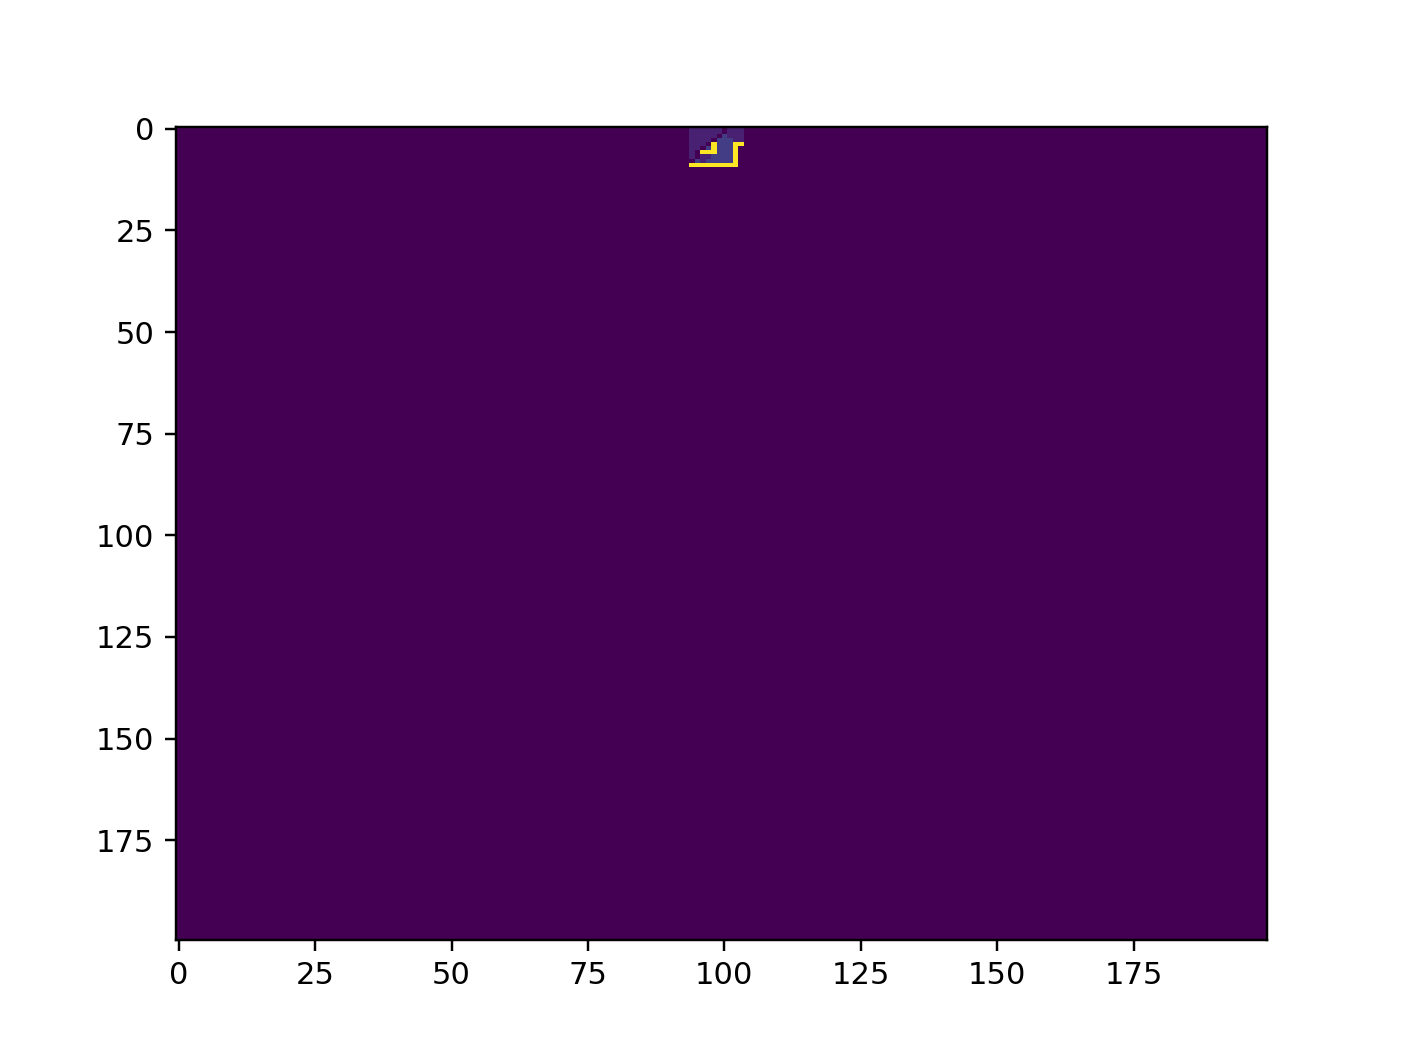

913 grains of sand in the grid


<IPython.core.display.Javascript object>


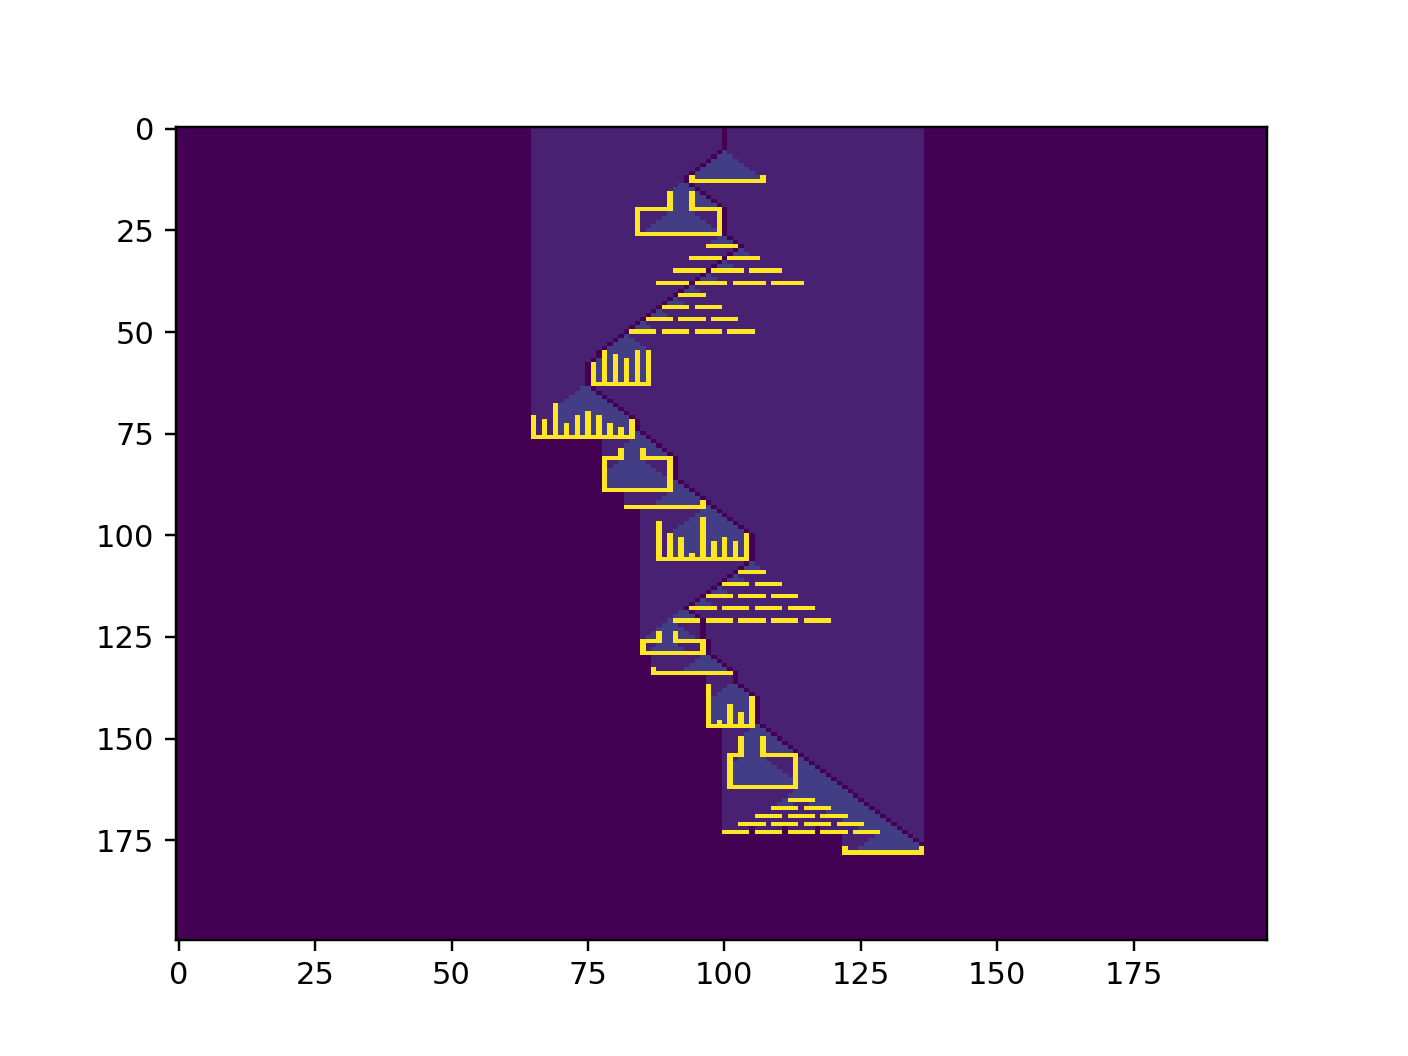

93 grains of sand in the grid


<IPython.core.display.Javascript object>


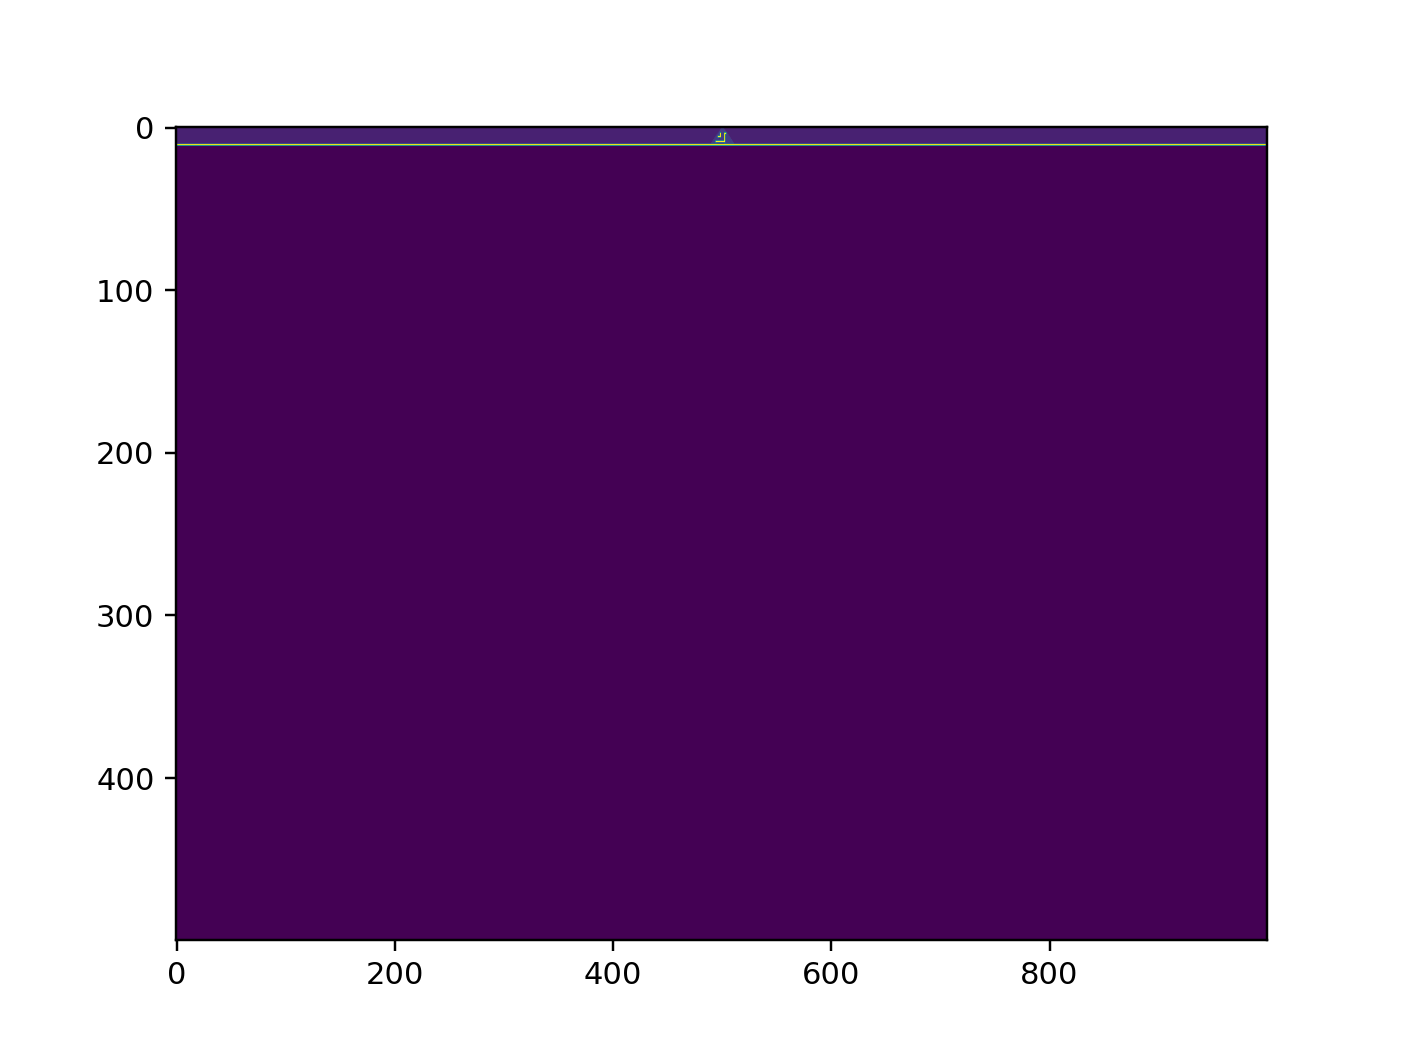

30762 grains of sand in the grid


<IPython.core.display.Javascript object>


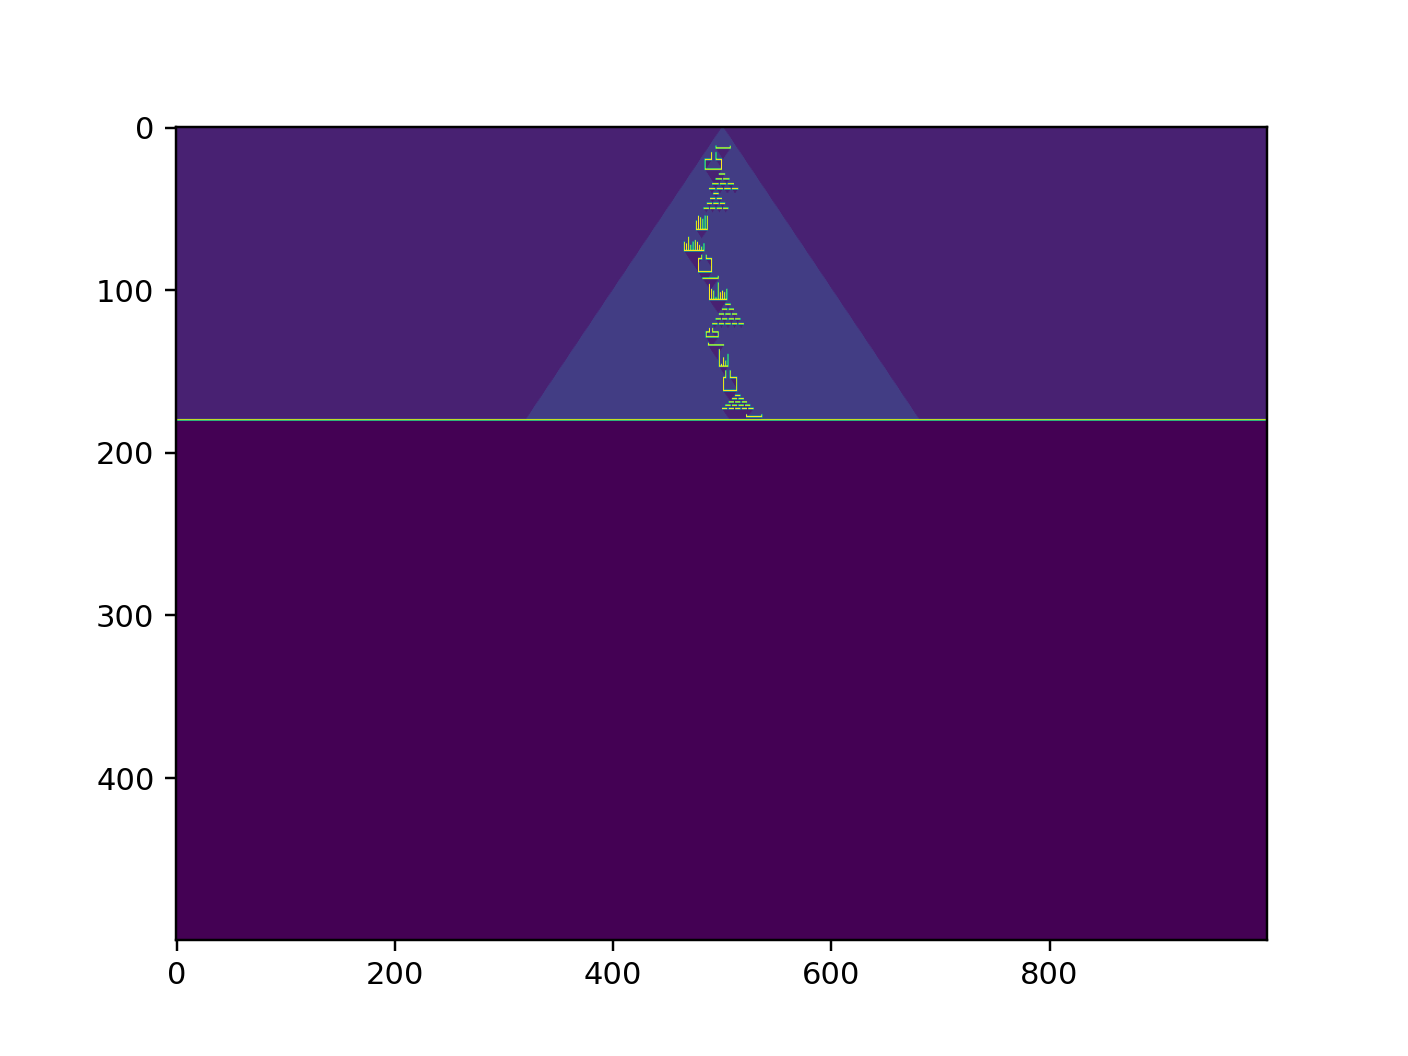

In [50]:
txtin = """498,4 -> 498,6 -> 496,6
503,4 -> 502,4 -> 502,9 -> 494,9""".split('\n')

with open('p14_input.txt', 'r') as fid:
    ptvals = fid.read().strip().split('\n')


def sandpour(textin):
    thegrid = np.zeros((200,200), dtype='int')
    #Air = 0
    #Rock = 10
    #Sand = 1
    #Escape = -1
    
    for ln in textin:
        pts = ln.split(' -> ')
        for ipx in range(len(pts)-1):
            pta = [int(pts[ipx].split(',')[1]), int(pts[ipx].split(',')[0])-400]
            ptb = [int(pts[ipx+1].split(',')[1]), int(pts[ipx+1].split(',')[0])-400]
            
            if pta[0] == ptb[0]:
                if pta[1] <= ptb[1]:
                    thegrid[pta[0], pta[1]:ptb[1]+1] = 10
                else:
                    thegrid[pta[0], ptb[1]:pta[1]+1] = 10
            else:
                if pta[0] <= ptb[0]:
                    thegrid[pta[0]:ptb[0]+1, pta[1]] = 10
                else:
                    thegrid[ptb[0]:pta[0]+1, pta[1]] = 10
    for ii in range(thegrid.shape[1]):
        idpos = np.where(thegrid[:, ii]>0)[0]
        if len(idpos) == 0:
            thegrid[:, ii] = -1
        else:
            thegrid[idpos[-1]+1:, ii] = -1
    sandcount = 0
    ct = 0
    while True:
        ct+= 1
        sndpos = [0,100]
        if thegrid[sndpos[0],sndpos[1]] == -1:
            break
        dprint(6,'Starting grain {}'.format(ct))
        escape = False
        while True:
            opos = sndpos.copy()
            if thegrid[sndpos[0]+1,sndpos[1]] <= 0:
                sndpos[0]+=1
            elif thegrid[sndpos[0]+1,sndpos[1]-1] <= 0:
                sndpos[0]+=1
                sndpos[1]-=1
            elif thegrid[sndpos[0]+1,sndpos[1]+1] <= 0:
                sndpos[0]+=1
                sndpos[1]+=1
            else:
                thegrid[sndpos[0],sndpos[1]] = 1
                sandcount += 1
                break
            dprint(6,'pos {} value {}'.format(sndpos, thegrid[sndpos[0],sndpos[1]]))
            if thegrid[sndpos[0],sndpos[1]] == -1:
                thegrid[opos[0],opos[1]] = -1
                escape = True
                break
#         if escape:
#             break
#         if ct >100:
#             break
    dprint(0,'{} grains of sand in the grid'.format(sandcount))
    _=plt.figure()
    _=plt.imshow(thegrid, aspect="auto")
def sandpour_inf(textin):
    thegrid = np.zeros((500,1000), dtype='int')
    #Air = 0
    #Rock = 10
    #Sand = 1
    #Escape = -1
    
    for ln in textin:
        pts = ln.split(' -> ')
        for ipx in range(len(pts)-1):
            pta = [int(pts[ipx].split(',')[1]), int(pts[ipx].split(',')[0])]
            ptb = [int(pts[ipx+1].split(',')[1]), int(pts[ipx+1].split(',')[0])]
            
            if pta[0] == ptb[0]:
                if pta[1] <= ptb[1]:
                    thegrid[pta[0], pta[1]:ptb[1]+1] = 10
                else:
                    thegrid[pta[0], ptb[1]:pta[1]+1] = 10
            else:
                if pta[0] <= ptb[0]:
                    thegrid[pta[0]:ptb[0]+1, pta[1]] = 10
                else:
                    thegrid[ptb[0]:pta[0]+1, pta[1]] = 10
    minvert = np.where(np.sum(thegrid, axis=1)>0)[0][-1] + 2
    thegrid[minvert,:] = 10
    for ii in range(thegrid.shape[1]):
        idpos = np.where(thegrid[:, ii]>0)[0]
        if len(idpos) == 0:
            thegrid[:, ii] = -1
        else:
            thegrid[idpos[-1]+1:, ii] = -1
    sandcount = 0
    ct = 0
    while True:
        ct+= 1
        sndpos = [0,500]
        if thegrid[sndpos[0],sndpos[1]] != 0:
            break
        dprint(6,'Starting grain {}'.format(ct))
        escape = False
        while True:
            opos = sndpos.copy()
            if thegrid[sndpos[0]+1,sndpos[1]] <= 0:
                sndpos[0]+=1
            elif thegrid[sndpos[0]+1,sndpos[1]-1] <= 0:
                sndpos[0]+=1
                sndpos[1]-=1
            elif thegrid[sndpos[0]+1,sndpos[1]+1] <= 0:
                sndpos[0]+=1
                sndpos[1]+=1
            else:
                thegrid[sndpos[0],sndpos[1]] = 1
                sandcount += 1
                break
            dprint(6,'pos {} value {}'.format(sndpos, thegrid[sndpos[0],sndpos[1]]))
            if thegrid[sndpos[0],sndpos[1]] == -1:
                thegrid[opos[0],opos[1]] = -1
                escape = True
                break
#         if escape:
#             break
#         if ct >100:
#             break
    dprint(0,'{} grains of sand in the grid'.format(sandcount))
    _=plt.figure()
    _=plt.imshow(thegrid, aspect="auto")
    
dbg=1
sandpour(txtin)
sandpour(ptvals)
sandpour_inf(txtin)
sandpour_inf(ptvals)
            



In [26]:
txtin = """Sensor at x=2, y=18: closest beacon is at x=-2, y=15
Sensor at x=9, y=16: closest beacon is at x=10, y=16
Sensor at x=13, y=2: closest beacon is at x=15, y=3
Sensor at x=12, y=14: closest beacon is at x=10, y=16
Sensor at x=10, y=20: closest beacon is at x=10, y=16
Sensor at x=14, y=17: closest beacon is at x=10, y=16
Sensor at x=8, y=7: closest beacon is at x=2, y=10
Sensor at x=2, y=0: closest beacon is at x=2, y=10
Sensor at x=0, y=11: closest beacon is at x=2, y=10
Sensor at x=20, y=14: closest beacon is at x=25, y=17
Sensor at x=17, y=20: closest beacon is at x=21, y=22
Sensor at x=16, y=7: closest beacon is at x=15, y=3
Sensor at x=14, y=3: closest beacon is at x=15, y=3
Sensor at x=20, y=1: closest beacon is at x=15, y=3""".split('\n')

with open('p15_input.txt', 'r') as fid:
    ptvals = fid.read().strip().split('\n')
    
    
def sense_beacons(textin, yv, mnmx):
    #build the sensor and becon grid
    sbxy = []
    minx = int(1e20)
    maxx = -int(1e20)
    miny = int(1e20)
    maxy = -int(1e20)
    maxd = 0
    mlt = 4000000
    
    for ln in textin:
        if ln.startswith('Sensor'):
            ll = ln.replace('Sensor at ','').replace(' closest beacon is at ','').split(':')
            lls = ll[0].split(',')
            sensx = int(lls[0].replace('x=',''))
            sensy = int(lls[1].replace('y=',''))
            llb = ll[1].split(',')
            bcnx = int(llb[0].replace('x=',''))
            bcny = int(llb[1].replace('y=',''))
            
            d1 = np.sum(np.abs(np.array([sensx, sensy])-np.array([bcnx, bcny])))
            if np.abs(sensy-yv) <= d1:
                minx = np.array([minx, sensx, bcnx]).min()
                maxx = np.array([minx, sensx, bcnx]).max()

                miny = np.array([miny, sensy, bcny]).min()
                maxy = np.array([miny, sensy, bcny]).max()
            
            maxd = np.array([maxd, d1]).max()
            sbxy.append({'sensxy':np.array([sensx, sensy]),
                       'bcnxy':np.array([bcnx, bcny]),
                       'dist':d1 })
            dprint(3,sbxy[-1])
    ctout = 0
    outlist = None
    used = []
    for isb, thisb in enumerate(sbxy):
        dy = np.abs(thisb['sensxy'][1]-yv)
        db = np.abs(thisb['bcnxy'][1]-yv)
        #dprint(2, 'dist = {}, yv={}, sensor'.format(dy, yv, thisb['sensxy']))
        if dy == 0:
            used.append(thisb['sensxy'][0])
        if db == 0:
            used.append(thisb['bcnxy'][0])
            
        if dy < thisb['dist']:
            dx = thisb['dist']-dy
            xadd = np.arange(thisb['sensxy'][0]-dx, thisb['sensxy'][0]+dx+1, dtype='int')
            if outlist is None:
                outlist = xadd
            else:
                outlist = np.unique(np.concatenate([outlist, xadd]))
    finout =[o for o in outlist if not o in used]
    dprint(2, finout)    
    dprint(2, used)    

        
    print('row {} has {} positions without a beacon'.format(yv, len(finout)))
    print('range of {}'.format(mnmx))
    if False:
        for iy in range(mnmx[0],mnmx[1]+1):
            outlist = None
            used = []
            for isb, thisb in enumerate(sbxy):
                dy = np.abs(thisb['sensxy'][1]-iy)
                db = np.abs(thisb['bcnxy'][1]-iy)
                #dprint(2, 'dist = {}, yv={}, sensor'.format(dy, yv, thisb['sensxy']))
                if dy == 0:
                    used.append(thisb['sensxy'][0])
                if db == 0:
                    used.append(thisb['bcnxy'][0])

                if dy < thisb['dist']:
                    dx = thisb['dist']-dy
                    xadd = np.arange(thisb['sensxy'][0]-dx, thisb['sensxy'][0]+dx+1, dtype='int')
                    if outlist is None:
                        outlist = xadd
                    else:
                        outlist = np.unique(np.concatenate([outlist, xadd]))
            #finout =[o for o in outlist if not o in used]
            outlist = outlist[outlist>=mnmx[0]]
            outlist = outlist[outlist<=mnmx[1]]
            dprint(2,'locked out length {}'.format(len(outlist)))
            if len(outlist) < 1+mnmx[1]-mnmx[0]:
                ix = np.where(np.diff(outlist)>1)[0][0]+1
                print('Beacon is at {},{} with freq {}'.format(ix, iy, ix*mlt+iy))
                break
            if iy%25 == 0:
                print('{} rows checked at {}'.format(iy, dt.datetime.now()))
    elif False:
        vi = np.arange(mnmx[1]+1)
        for iy in range(mnmx[0],mnmx[1]+1):
            vv = np.zeros(mnmx[1]+1, dtype=np.int8)
            for isb, thisb in enumerate(sbxy):
                dy = np.abs(thisb['sensxy'][1]-iy)
                dx = np.abs(thisb['sensxy'][0]-vi)
                vv += (dx+dy)<=thisb['dist']
            dprint(10,vv)
            if vv.min() == 0:
                ix = np.where(vv==0)[0][0]
                print('Beacon is at {},{} with freq {}'.format(ix, iy, ix*mlt+iy))
                break
            if iy%25 == 0:
                print('{} rows checked at {}'.format(iy, dt.datetime.now()))
    else:
        sxy = None
        sxy = np.zeros((len(sbxy), 2), dtype='int')
        dis = np.zeros(len(sbxy), dtype='int')
        for isb1, sb1 in enumerate(sbxy):
            sxy[isb1,:] = sb1['sensxy']
            dis[isb1] = sb1['dist']

        for isb1, sb1 in enumerate(sbxy):
            dthis = sb1['dist']
            #print(sb1)
            for ixi in range(-sb1['dist']-1, sb1['dist']+2):
                iyi = dthis + 1 - np.abs(ixi)
                ix = sb1['sensxy'][0]+ixi
                iy = sb1['sensxy'][1]+iyi
                #print(ix,iy)
                dchk = np.sum(np.abs(sxy - np.atleast_2d([ix,iy])), axis=1)
                dvalid = all(dchk>dis)
                if dvalid:

                    if (iy>=mnmx[0] and ix>=mnmx[0] and
                        iy<=mnmx[1] and ix<=mnmx[1]):
                        print('---Apparent match at {}---'.format([ix,iy]))
                        print(sb1)
                        print(ix,iy)
                        print(isb1)
                        print(dchk)
                        print(dis)
                        print((dchk>dis).astype('int'))
                        print('Beacon is at {},{} with freq {}'.format(ix, iy, ix*mlt+iy))
                iy = sb1['sensxy'][1]-iyi
                iy = sb1['sensxy'][1]-iyi
                #print(ix,iy)
                dchk = np.sum(np.abs(sxy - np.atleast_2d([ix,iy])), axis=1)
                dvalid = all(dchk>dis)
                if dvalid:
                    
                    if (iy>=mnmx[0] and ix>=mnmx[0] and
                        iy<=mnmx[1] and ix<=mnmx[1]):
                        print('---Apparent match at {}---'.format([ix,iy]))
                        print(sb1)
                        print(ix,iy)
                        print(isb1)
                        print(dchk)
                        print(dis)
                        print((dchk>dis).astype('int'))
                        print('Beacon is at {},{} with freq {}'.format(ix, iy, ix*mlt+iy))
            print('{} boxes checked at {}'.format(isb1+1, dt.datetime.now()))
                
        
        
        
        
        
#         for iy in range(mnmx[0],mnmx[1]+1):
#             vv = np.zeros(mnmx[1]+1, dtype=np.int8)
#             for isb, thisb in enumerate(sbxy):
#                 dy = np.abs(thisb['sensxy'][1]-iy)
#                 dx = np.abs(thisb['sensxy'][0]-vi)
        
    
    
dbg = 1
mnmx = [0,20]
sense_beacons(txtin, 10, mnmx)
dbg = 1
mnmx = [0,4000000]
sense_beacons(ptvals, 2000000, mnmx)
            
    
    


[-2, -1, 0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[2, 2, 2]
row 10 has 26 positions without a beacon
range of [0, 20]
1 boxes checked at 2022-12-15 11:32:43.943367
2 boxes checked at 2022-12-15 11:32:43.943650
3 boxes checked at 2022-12-15 11:32:43.944136
---Apparent match at [14, 11]---
{'sensxy': array([12, 14]), 'bcnxy': array([10, 16]), 'dist': 4}
14 11
3
[19 10 10  5 13  6 10 23 14  9 12  6  8 16]
[ 7  1  3  4  4  5  9 10  3  8  6  5  1  7]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Beacon is at 14,11 with freq 56000011
4 boxes checked at 2022-12-15 11:32:43.945008
5 boxes checked at 2022-12-15 11:32:43.945576
---Apparent match at [14, 11]---
{'sensxy': array([14, 17]), 'bcnxy': array([10, 16]), 'dist': 5}
14 11
5
[19 10 10  5 13  6 10 23 14  9 12  6  8 16]
[ 7  1  3  4  4  5  9 10  3  8  6  5  1  7]
[1 1 1 0 1 1 1 1 1 1 1 1 1 1]
Beacon is at 14,11 with freq 56000011
6 boxes checked at 2022-12-15 11:32:43.947157
---Apparent match at [14, 11]---
{'s

In [148]:
txtin = """Valve AA has flow rate=0; tunnels lead to valves DD, II, BB
Valve BB has flow rate=13; tunnels lead to valves CC, AA
Valve CC has flow rate=2; tunnels lead to valves DD, BB
Valve DD has flow rate=20; tunnels lead to valves CC, AA, EE
Valve EE has flow rate=3; tunnels lead to valves FF, DD
Valve FF has flow rate=0; tunnels lead to valves EE, GG
Valve GG has flow rate=0; tunnels lead to valves FF, HH
Valve HH has flow rate=22; tunnel leads to valve GG
Valve II has flow rate=0; tunnels lead to valves AA, JJ
Valve JJ has flow rate=21; tunnel leads to valve II""".split('\n')

with open('p16_input.txt', 'r') as fid:
    ptvals = fid.read().strip().split('\n')
def print_path(p):
    print('path score {}'.format(p[0]))
    for r,st in zip(p[1],p[2]):
        print('\t position {} rate {}'.format(st,r))
    print('Valves opened {}'.format(', '.join(p[3])))
    
def vitflow(textin, tm=30):
    # build the structure
    pths = {}
    for ln in textin:
        if 'valves' in ln:
            pths[ln.replace('Valve ','').split(' has')[0]] = {
                'rate':int(ln.split('rate=')[1].split(';')[0]),
                'closed':True,
                'next':ln.split('tunnels lead to valves ')[1].split(', ')}
        else:
            pths[ln.replace('Valve ','').split(' has')[0]] = {
                'rate':int(ln.split('rate=')[1].split(';')[0]),
                'closed':True,
                'next':[ln.split('tunnel leads to valve ')[1]]}
    numopenable = 0
    for ky in pths.keys():
        print('{} :: {}'.format(ky, pths[ky]))
        numopenable += int(pths[ky]['rate'] > 0)
    pathlist = [[0, [0], ['AA'], [], 0]]
    path_hash = defaultdict(lambda: False)
    
    mxpaths = 2**13
    for t in range(tm+1):
        pp = []
        for px, pa in enumerate(pathlist):
            
            #print(pa[2][-1])
            if not pa[2][-1] in pa[3] and pths[pa[2][-1]]['rate'] > 0:
                #print('\topen')
                #pths[pa[2][-1]]['closed'] = False
                pn = copy.deepcopy(pa)
                pn[3].append(pa[2][-1])
                pn[0] = pa[0]-pn[1][-1]
                pn[4] = pths[pa[2][-1]]['rate']
                pn[1].append(pa[1][-1])
                pn[2].append(pa[2][-1])
                pn[4] = pths[pa[2][-1]]['rate']
                #print(pn)
                heapq.heappush(pp, pn) #pp.append(pn)
            #else:print('\tclosed')
            for o in pths[pa[2][-1]]['next']:
                pn = copy.deepcopy(pa)
                pn[0] = pa[0]-pn[1][-1]
                pn[1].append(pa[1][-1]+pn[4])
                pn[2].append(o)
                pn[4] = 0
                #print(pn)
                if len(pp) < 10:
                    heapq.heappush(pp, pn) #pp.append(pn)
                else:
                    pna = [o]
                    pna.extend(pn[3])
                    pn3t = tuple(pna)
                    if path_hash[pn3t]:
                        if pn[0] < path_hash[pn3t][0][0]:
                            heapq.heappush(pp, pn)
                            heapq.heappush(path_hash[pn3t], [pn[0], t])
                    else:
                        heapq.heappush(pp, pn)
                        path_hash[pn3t] = [[pn[0], t]]
                #heapq.heappush(pp, pn) #pp.append(pn)
        # sort
        # print('pp= {}'.format(pp))
        #rates = np.array([pa[0] for pa in pp])
        #print('rates = {}'.format(rates))
        #ind = np.argsort(rates)[::-1]
        #print('sort order {}'.format(ind))
        if len(pp) > mxpaths:
            pathlist = copy.deepcopy(pp[:mxpaths])
        else:
            pathlist = copy.deepcopy(pp)
        # print(len(pp), len(pathlist))
        print('Iteration {}, first path {}, {}th path {}'.format(t, pathlist[0][0], len(pathlist), pathlist[-1][0]))
    #for p in pathlist[:3]:
    print_path(pathlist[0])
        
    #two actors
    pathlist = [[0, [0], ['AAAA'], [], 0]]
    
    mxpaths = 2**17

    path_hash = defaultdict(lambda: False)
    for t in range(tm-3):
        pp = []
        for px, pa in enumerate(pathlist):
            
            me = pa[2][-1][:2]
            el = pa[2][-1][2:]
            if False and len(pa[3]) == numopenable:
                if printonce:
                    print('All opened at {}'.format(t))
                    printonce = False
                nx1 = [me]
                nx2 = [el]
            else:
                nx1 = [me]
                nx1.extend(copy.deepcopy(pths[me]['next']))
                if el != me:
                    nx2 = [el]
                    nx2.extend(copy.deepcopy(pths[el]['next']))
                else:
                    nx2 = copy.deepcopy(pths[el]['next'])
            for o1 in nx1:
                for o2 in nx2:
                    keep=True
                    #if o1 == o2:
                    #    continue
                    
                    pn = copy.deepcopy(pa)
                    pn[0] = pa[0]-pn[1][-1]
                    pn[1].append(pa[1][-1]+pn[4])
                    pn[4] = 0
                    pn[2].append(o1+o2)
                    if o1 == me:
                        if pths[me]['rate']>0 and not me in pa[3]:
                            pn[4] += pths[me]['rate']
                            heapq.heappush(pn[3], o1)
                        else:
                            keep = False
                    if o2 == el:
                        if pths[el]['rate']>0 and not el in pn[3]:
                            pn[4] += pths[el]['rate']
                            heapq.heappush(pn[3], o2)
                        else:
                            keep = False
                    if keep:
                        if len(pp) < 1024:
                            heapq.heappush(pp, pn) #pp.append(pn)
                        else:
                            pna = [o1+o2]
                            pna.extend(pn[3])
                            pn3t = tuple(pna)
                            pnb = [o2+o1]
                            pnb.extend(pn[3])
                            pn3r = tuple(pnb)
                            if path_hash[pn3t]:
                                if pn[0] <= path_hash[pn3t][0][0]:
                                    heapq.heappush(pp, pn)
                                    heapq.heappush(path_hash[pn3t], [pn[0], t])
                                    heapq.heappush(path_hash[pn3r], [pn[0], t])
                            else:
                                heapq.heappush(pp, pn)
                                path_hash[pn3t] = [[pn[0], t]]
                                path_hash[pn3r] = [[pn[0], t]]
        # sort
        # print('pp= {}'.format(pp))
        if len(pp) > mxpaths:
            pathlist = copy.deepcopy(pp[:mxpaths])
        else:
            pathlist = copy.deepcopy(pp)
        #print(len(pp), len(pathlist))
        print('Iteration {}, first path {}, {}th path {}'.format(t, pathlist[0][0], len(pathlist), pathlist[-1][0]))
    
    #for p in pathlist[:3]:
    print_path(pathlist[0])
        
            

In [151]:
import re
matches = re.match("Valve (.*) has flow rate=(.*); tunnels? leads? to valves? (.*)$", ptvals[0]).groups()
print(matches)

('MO', '0', 'QM, ED')


In [152]:
print(dt.datetime.now())
vitflow(txtin)
print(dt.datetime.now())
vitflow(ptvals)
print(dt.datetime.now())

2022-12-16 16:55:39.925503
AA :: {'rate': 0, 'closed': True, 'next': ['DD', 'II', 'BB']}
BB :: {'rate': 13, 'closed': True, 'next': ['CC', 'AA']}
CC :: {'rate': 2, 'closed': True, 'next': ['DD', 'BB']}
DD :: {'rate': 20, 'closed': True, 'next': ['CC', 'AA', 'EE']}
EE :: {'rate': 3, 'closed': True, 'next': ['FF', 'DD']}
FF :: {'rate': 0, 'closed': True, 'next': ['EE', 'GG']}
GG :: {'rate': 0, 'closed': True, 'next': ['FF', 'HH']}
HH :: {'rate': 22, 'closed': True, 'next': ['GG']}
II :: {'rate': 0, 'closed': True, 'next': ['AA', 'JJ']}
JJ :: {'rate': 21, 'closed': True, 'next': ['II']}
Iteration 0, first path 0, 3th path 0
Iteration 1, first path 0, 9th path 0
Iteration 2, first path 0, 20th path 0
Iteration 3, first path -20, 35th path 0
Iteration 4, first path -40, 45th path 0
Iteration 5, first path -63, 66th path 0
Iteration 6, first path -93, 95th path 0
Iteration 7, first path -126, 148th path -22
Iteration 8, first path -162, 231th path -44
Iteration 9, first path -203, 330th path

Iteration 11, first path -216, 1754th path -21
Iteration 12, first path -273, 2852th path -24
Iteration 13, first path -330, 4745th path -27
Iteration 14, first path -391, 7754th path -51
Iteration 15, first path -464, 8192th path -78
Iteration 16, first path -537, 8192th path -204
Iteration 17, first path -610, 8192th path -369
Iteration 18, first path -683, 8192th path -361
Iteration 19, first path -756, 8192th path -477
Iteration 20, first path -839, 8192th path -628
Iteration 21, first path -925, 8192th path -577
Iteration 22, first path -1018, 8192th path -732
Iteration 23, first path -1111, 8192th path -909
Iteration 24, first path -1205, 8192th path -1018
Iteration 25, first path -1315, 8192th path -1062
Iteration 26, first path -1425, 8192th path -1165
Iteration 27, first path -1548, 8192th path -1345
Iteration 28, first path -1680, 8192th path -1456
Iteration 29, first path -1812, 8192th path -1605
Iteration 30, first path -1944, 8192th path -1670
path score -1944
	 position A

KeyboardInterrupt: 

In [145]:
    

vitflow(txtin)
vitflow(ptvals)

AA :: {'rate': 0, 'closed': True, 'next': ['DD', 'II', 'BB']}
BB :: {'rate': 13, 'closed': True, 'next': ['CC', 'AA']}
CC :: {'rate': 2, 'closed': True, 'next': ['DD', 'BB']}
DD :: {'rate': 20, 'closed': True, 'next': ['CC', 'AA', 'EE']}
EE :: {'rate': 3, 'closed': True, 'next': ['FF', 'DD']}
FF :: {'rate': 0, 'closed': True, 'next': ['EE', 'GG']}
GG :: {'rate': 0, 'closed': True, 'next': ['FF', 'HH']}
HH :: {'rate': 22, 'closed': True, 'next': ['GG']}
II :: {'rate': 0, 'closed': True, 'next': ['AA', 'JJ']}
JJ :: {'rate': 21, 'closed': True, 'next': ['II']}
Iteration 0, first path 0, 3th path 0
Iteration 1, first path 0, 9th path 0
Iteration 2, first path 0, 25th path 0
Iteration 3, first path -20, 71th path 0
Iteration 4, first path -40, 198th path 0
Iteration 5, first path -63, 556th path 0
Iteration 6, first path -93, 1533th path 0
Iteration 7, first path -126, 4247th path 0
Iteration 8, first path -162, 8192th path 0
Iteration 9, first path -203, 8192th path -91
Iteration 10, first

Iteration 7, first path -45, 7529th path 0
Iteration 8, first path -83, 8192th path 0
Iteration 9, first path -121, 8192th path 0
Iteration 10, first path -159, 8192th path -60
Iteration 11, first path -216, 8192th path -75
Iteration 12, first path -273, 8192th path -120
Iteration 13, first path -330, 8192th path -135
Iteration 14, first path -391, 8192th path -265
Iteration 15, first path -464, 8192th path -349
Iteration 16, first path -537, 8192th path -387
Iteration 17, first path -610, 8192th path -520
Iteration 18, first path -683, 8192th path -615
Iteration 19, first path -756, 8192th path -672
Iteration 20, first path -839, 8192th path -729
Iteration 21, first path -925, 8192th path -877
Iteration 22, first path -1018, 8192th path -975
Iteration 23, first path -1111, 8192th path -1048
Iteration 24, first path -1205, 8192th path -1121
Iteration 25, first path -1315, 8192th path -1269
Iteration 26, first path -1425, 8192th path -1355
Iteration 27, first path -1548, 8192th path -14

In [67]:
import copy
pb = [[0, [0], ['AA']]]
print(pb)
pc = copy.deepcopy(pb[0])
print(pc)
print(pc[0])
pc[0]=2
pc[1].append(1)
print(pb)
print(pc)

[[0, [0], ['AA']]]
[0, [0], ['AA']]
0
[[0, [0], ['AA']]]
[2, [0, 1], ['AA']]


In [117]:
pathh = defaultdict(lambda: False)


if pathh['d']:
    print('Seems valid')
else:
    print('not there')
    pathh['d'] = ['d']
if pathh['d']:
    print('Seems valid')
else:
    print('not there')
    pathh['d'] = ['d']
    


not there
Seems valid


In [129]:
p2 = []
p3 = []
alphabet = string.ascii_lowercase
for ii in range(30):
    i1 = np.random.randint(0,26)
    i2 = np.random.randint(0,26)
    ths = alphabet[i1]+alphabet[i2]
    heapq.heappush(p3,ths)
    p2.append(ths)
print(p2)
print(p3)
print(sorted(p3))

['hu', 'wu', 'dp', 'kj', 'nj', 'vm', 'hk', 'mc', 'ad', 'jv', 'ij', 'rf', 'rt', 'he', 'gg', 'in', 'bp', 'rh', 'gj', 'so', 'gu', 'sw', 'cv', 'gt', 'ty', 'oq', 'it', 'ey', 'jd', 'zn']
['ad', 'bp', 'ey', 'dp', 'cv', 'gt', 'gg', 'in', 'gj', 'ij', 'gu', 'rf', 'it', 'he', 'hk', 'wu', 'kj', 'rh', 'mc', 'so', 'nj', 'sw', 'jv', 'vm', 'ty', 'rt', 'oq', 'hu', 'jd', 'zn']
['ad', 'bp', 'cv', 'dp', 'ey', 'gg', 'gj', 'gt', 'gu', 'he', 'hk', 'hu', 'ij', 'in', 'it', 'jd', 'jv', 'kj', 'mc', 'nj', 'oq', 'rf', 'rh', 'rt', 'so', 'sw', 'ty', 'vm', 'wu', 'zn']


In [237]:
the_rocks="""####

.#.
###
.#.

..#
..#
###

#
#
#
#

##
##
""".split('\n')

txtin = """>>><<><>><<<>><>>><<<>>><<<><<<>><>><<>>"""
rcrd = {'.':0, '#':1}

with open('p17_input.txt', 'r') as fid:
    ptvals = fid.read()
def rockroller(thr):
    allrocks=[]
    thisrock=[]
    ctr = 0
    for th in thr:
        #print(th)
        if len(th) == 0:
            ctr=0
            allrocks.append(np.array(thisrock)[::-1,:])
            thisrock = []
        else:
            thisrock.append([])
            for t in th:
                thisrock[ctr].append(rcrd[t])
            ctr+=1
    #print(allrocks)
    return allrocks

def droprocks(textin, arocks, numrocks=2022):
    
    sides = np.zeros((1,9), dtype='int')
    sides[0,0] = 1
    sides[0,-1] = 1
    cilinder = np.zeros((2, 9), dtype='int')
    cilinder[0,:]=3
    cilinder[:,0]=1
    cilinder[:,-1]=1
    
    lftrt = {'<':-1, '>':1}
    nt = len(textin)
    
    thsrock = 0
    itrock = 0
    itpush = 0
    nxtltr = 0
    newrock_ll = 3
    ct = 0
    hte = 0
    htsave = []
    
    while True:
        ct += 1
        if thsrock == 10*len(textin)*len(arocks):
            print('Count out')
            n1 = len(htsave)
            nfft = int(2**np.ceil(np.log2(n1)+2))
            hta= np.array(htsave)
            
            print('estimating the results from the accrued data, {} points'.format(n1))
            
            basic_period = len(textin)*len(arocks)
            
            print('Differences at basic period:')
            for ii in range(20):
                print('\t{}, {}'.format(ii, np.diff(hta[ii+np.arange(9, dtype='int')*basic_period])))
            
            poly = np.polyfit(np.arange(n1), hta, 1)
            #print('Polynomial fit {}'.format(poly))
            
            
                
            
            
            #print(h1t.shape)
            
            
            rh1t = np.fft.ifft(np.abs(np.fft.fft(hta - np.polyval(poly, np.arange(n1, dtype='int')), nfft))**2)
            
            
            i1 = numrocks//basic_period
            i2 = numrocks%basic_period
            
            estheight = int(poly[0])*i1*basic_period + int(poly[1]) + hta[i2+basic_period] - hta[basic_period]
            
            #print('at rock {} the value is {}'.format(numrocks, estheight))
            #print('at rock {} the value is {}'.format(numrocks, estheight))
            
            #_=plt.figure()
            #_=plt.plot(rh1t.real)
            
            #_=plt.figure()
            if len(textin) < 300:
                nmod = 5*35
            else:
                nmod = 1715
            
            print('A better estimate:')
            
            nv = (numrocks-2*nmod)//nmod
            nm = (numrocks-2*nmod)%nmod
            
            nn = int(hta[3*nmod+nm] - hta[2*nmod+nm])
            n0 = int(hta[2*nmod+nm])
            
            
            extv = n0+nn*nv
            
            print('\t{}'.format(extv))
            
#             _=plt.plot(hta[:nmod])
            
#             for ii in range(1,10):
#                 if (ii+1)*nmod<n1:
#                     _=plt.plot(ii*10+hta[ii*nmod:(ii+1)*nmod]-hta[ii*nmod])
#             #_=plt.plot(hta[2*nmod:]-hta[2*nmod])
            
            
            break
        if itrock == 0:
            #it's a new rock
            
            if cilinder.shape[0] > 1100:
                cilinder = cilinder[1000:,:]
                hte += 1000
            
            ht = np.sum(cilinder.max(axis=1) >= 2)
            rh,rw = arocks[thsrock%len(arocks)].shape 
            r2a = rh+4+ht - cilinder.shape[0] 
            #print('cilinder initial shape {} mx haight {}, rock size {}x{}'.format(cilinder.shape, ht, rh, rw))
            
            if r2a>0:
                cilinder = np.concatenate([cilinder, np.zeros((r2a, 9), dtype='int')], axis=0)
                cilinder[:,0]=1
                cilinder[:,-1]=1
            #print('adjusted rock shape {}, measured height {}'.format(cilinder.shape, ht))
            #ff,aa=plt.subplots(1,3)
            #_=aa[0].imshow(cilinder, origin='lower', aspect="auto")
    
            rkht = ht+3
            rkx = 3
            cwr = cilinder.copy()
            rockplot = np.concatenate([np.zeros((rh, rkx), dtype='int'), 
                                       arocks[thsrock%len(arocks)],
                                       np.zeros((rh, 9-(rkx+rw)), dtype='int')], axis=1)
            #print('Chip to add shape {}'.format(rockplot.shape))
            #print('Chip to add to {}'.format(cwr[rkht:rkht+rh, :].shape))
            
            cwr[rkht:rkht+rh, :] += rockplot
            #_=aa[1].imshow(cwr, origin='lower', aspect="auto")
            cwr[rkht:rkht+rh, :][:,rkx:rkx+rw] -= arocks[thsrock%len(arocks)]
        
        itrock += 1
        rkx += lftrt[textin[itpush%nt]]
        
        this_block = arocks[thsrock%len(arocks)]*cilinder[rkht:rkht+rh, :][:,rkx:rkx+rw] + arocks[thsrock%len(arocks)]
        #print(this_block)
        
        mxpush = (this_block).max()
        
        if mxpush > 1:
            rkx -= lftrt[textin[itpush%nt]]
        #print('Push {}'.format(lftrt[textin[itpush]]))
        #print('x={}, y={}, mxpush {}'.format(rkx, rkht, mxpush))
        
        itpush+=1
        
        #drop
        rkht -= 1
        mxdrop = (arocks[thsrock%len(arocks)]*cilinder[rkht:rkht+rh, :][:,rkx:rkx+rw] + arocks[thsrock%len(arocks)]).max()
        if mxdrop > 1:
            rkht += 1
            cilinder[rkht:rkht+rh, :][:,rkx:rkx+rw] += 2*arocks[thsrock%len(arocks)]
            #_=aa[2].imshow(cilinder, origin='lower', aspect="auto")
            #print('x={}, y={}, mxdrop {}'.format(rkx, rkht, mxpush))
            itrock = 0
            thsrock += 1
        
            ht = np.sum(cilinder.max(axis=1) >= 2)
            htsave.append(ht + hte - 1)
        if thsrock == numrocks:
            
            print('Height is {} at rock {}'.format(ht-1+hte, thsrock))
            break
        #print('x={}, y={}, mxdrop {}'.format(rkx, rkht, mxpush))
        
        
        
        
        
        # Push it real good
    
    return np.array(htsave)
print(len(ptvals)-1)

arocks = rockroller(the_rocks)
print(len(arocks))
print('Test data')
droprocks(txtin, arocks)
print('Full data')
droprocks(ptvals.replace('\n', ''), arocks)

print('Part B')
droprocks(txtin, arocks, numrocks=1000000000000) 


print('Part B real')
droprocks(ptvals.replace('\n', ''), arocks, numrocks=1000000000000) 

#print(ptvals)

10091
5
Test data
Count out
estimating the results from the accrued data, 2000 points
Differences at basic period:
	0, [308 300 306 302 304 301 306 301]
	1, [308 300 305 302 304 302 305 302]
	2, [308 301 303 304 304 301 304 303]
	3, [309 303 301 306 300 301 306 303]
	4, [307 303 301 306 301 300 306 303]
	5, [306 304 301 306 301 300 306 302]
	6, [305 304 302 305 302 300 305 302]
	7, [306 304 301 304 303 301 303 304]
	8, [308 300 301 306 303 303 301 306]
	9, [308 301 300 306 303 303 301 306]
	10, [308 301 300 306 302 304 301 306]
	11, [307 302 300 305 302 304 302 305]
	12, [306 303 301 303 304 304 301 304]
	13, [308 303 303 301 306 300 301 306]
	14, [306 303 303 301 306 301 300 306]
	15, [306 302 304 301 306 301 300 306]
	16, [305 302 304 302 305 302 300 305]
	17, [303 304 304 301 304 303 301 303]
	18, [301 306 300 301 306 303 303 301]
	19, [301 306 301 300 306 303 303 301]
A better estimate:
	3070
Full data
Height is 3059 at rock 2022
Part B
Count out
estimating the results from the acc

array([     1,      3,      4, ..., 757295, 757295, 757295])

In [ ]:
1514285714827
1514285714289
1514285714288

1500874635588

In [281]:
txtin = """2,2,2
1,2,2
3,2,2
2,1,2
2,3,2
2,2,1
2,2,3
2,2,4
2,2,6
1,2,5
3,2,5
2,1,5
2,3,5""".split('\n')

with open('p18_input.txt', 'r') as fid:
    ptvals = fid.read().strip().split('\n')
#print(txtin)
#print(ptvals)
def adcheck(ix,iy,iz):
    tock = []
    tock.append([ix-1, iy, iz])
    tock.append([ix+1, iy, iz])
    tock.append([ix, iy-1, iz])
    tock.append([ix, iy+1, iz])
    tock.append([ix, iy, iz-1])
    tock.append([ix, iy, iz+1])
    return tock

def facecount(textin):
    cube_hash = defaultdict(lambda: False)
    vv = []
    for ln in textin:
        vals = eval('['+ln+']')
        vv.extend(vals)
        if len(ln)>3:
            cube_hash[ln] = True
    vva = np.array(vv)
    xmn = vva[::3].min()
    xmx = vva[::3].max()
    ymn = vva[1::3].min()
    ymx = vva[1::3].max()
    zmn = vva[2::3].min()
    zmx = vva[2::3].max()
    
    #print('x {}-{}'.format(xmn, xmx))
    #print('y {}-{}'.format(ymn, ymx))
    #print('z {}-{}'.format(zmn, zmx))
    
    print('{} total volume'.format((xmx+3-xmn)*(ymx+3-ymn)*(zmx+3-zmn)))
    
    ctall = 0
    for ln in textin:
        
        if len(ln)>3:
            #print(ln)
            vals = eval('['+ln+']')
            ctall+=6
            for i1 in range(3):
                for i2 in [-1, 1]:
                    adj = '{},{},{}'.format(vals[0]+i2*(i1==0), vals[1]+i2*(i1==1), vals[2]+i2*(i1==2))
                    #print(adj, cube_hash[adj])
                    if cube_hash[adj]:
                        ctall -= 1
    # recount this
    print('{} faces unblocked'.format(ctall))
    open_hash = defaultdict(lambda: False)
    interior_hash = defaultdict(lambda: False)
    
    

    for ix in range(xmn-1, xmx+2):
        for iy in range(ymn-1, ymx+2):
            op = '{},{},{}'.format(ix, iy, zmn-1)
            open_hash[op] = True
            op = '{},{},{}'.format(ix, iy, zmx+1)
            open_hash[op] = True
    for ix in range(xmn-1, xmx+2):
        for iz in range(zmn-1, zmx+2):
            op = '{},{},{}'.format(ix, ymn-1, iz)
            open_hash[op] = True
            op = '{},{},{}'.format(ix, ymx+1, iz)
            open_hash[op] = True
    for iz in range(zmn-1, zmx+2):
        for iy in range(ymn-1, ymx+2):
            op = '{},{},{}'.format(xmn-1, iy, iz)
            open_hash[op] = True
            op = '{},{},{}'.format(xmx+1, iy, iz)
            open_hash[op] = True
    while True:
        openlen = len(open_hash)
        for ix in range(xmn, xmx+1):
            for iy in range(ymn, ymx+1):
                for iz in range(zmn, zmx+1):
                    ck = '{},{},{}'.format(ix, iy, iz)
                    if not open_hash[ck] and not cube_hash[ck]:
                        openadj = False
                        
                        this_block = defaultdict(lambda: False)
                        this_block[ck] = True
                        cpk_list = adcheck(ix,iy,iz)
                        
                        while len(cpk_list) > 0:
                            cpkl = cpk_list.pop(0)
                            cpk = '{},{},{}'.format(cpkl[0], cpkl[1], cpkl[2])
                            if open_hash[cpk]:
                                openadj = True
                            elif not cube_hash[cpk] and not this_block[cpk] and not interior_hash[cpk]:
                                this_block[cpk] = True
                                cpk_list.extend(adcheck(cpkl[0], cpkl[1], cpkl[2]))
                        if openadj:
                            for ky in this_block.keys():
                                open_hash[ky]= True
                        else:
                            for ky in this_block.keys():
                                interior_hash[ky]= True
        #print('Opens were {}, now {}'.format(openlen, len(open_hash)))
        if len(open_hash) == openlen:
            break
                            
    print('{} open cubes'.format(openlen))
    
#     ctplot = 0
#     for ix in range(xmn-1, xmx+2):
#         zpl = np.zeros((ymx+3-zmn, zmx+3-zmn))
#         for iy in range(ymn-1, ymx+2):
#             for iz in range(zmn-1, zmx+2):
#                 ck = '{},{},{}'.format(ix, iy, iz)
#                 zpl[iy-(ymn-1), iz-(zmn-1)] = 5*int(cube_hash[ck]) + int(open_hash[ck]) + 3*interior_hash[ck]
#         if ctplot%9 == 0:
#             fp, axp = plt.subplots(3,3)
#         axp[(ctplot%9)//3, ctplot%3].imshow(zpl)
#         axp[(ctplot%9)//3, ctplot%3].set_title('x={}'.format(ix))
#         ctplot += 1
#         plt.tight_layout()
    #for ky in open_hash.keys():
    #    print(ky)
    ctopen = 0
    for ln in textin:
        if len(ln)>3:
            #print(ln)
            vals = eval('['+ln+']')
            for i1 in range(3):
                for i2 in [-1, 1]:
                    tv = vals[0]+i2*(i1==0), vals[1]+i2*(i1==1), vals[2]+i2*(i1==2)
                    
                    adj = '{},{},{}'.format(tv[0], tv[1], tv[2])
                    
                    #print(adj, cube_hash[adj])
                    if not cube_hash[adj]:
                        if open_hash[adj]:
                            ctopen += 1
    
    print('second count {} open faces'.format(ctopen))
print(dt.datetime.now())
facecount(txtin)
print(dt.datetime.now())
facecount(ptvals)
print(dt.datetime.now())
    
    


2022-12-18 11:52:56.976104
200 total volume
64 faces unblocked
200 open cubes
second count 58 open faces
2022-12-18 11:52:56.978094
12696 total volume
4244 faces unblocked
12696 open cubes
second count 2460 open faces
2022-12-18 11:52:57.171741


In [340]:
print(5**6)

15625


In [428]:
txtin = """Blueprint 1: Each ore robot costs 4 ore. Each clay robot costs 2 ore. Each obsidian robot costs 3 ore and 14 clay. Each geode robot costs 2 ore and 7 obsidian.
Blueprint 2: Each ore robot costs 2 ore. Each clay robot costs 3 ore. Each obsidian robot costs 3 ore and 8 clay. Each geode robot costs 3 ore and 12 obsidian""".split('\n')

fn = 'p19_input.txt'
if os.path.exists(fn):
    with open(fn, 'r') as fid:
        ptvals = fid.read().strip().split('\n')
        
        
dbg = 1
def read_costs(costs):
    dprint(5, 'reading the {}'.format(costs))
    thiscost = {'ore':0, 'clay':0, 'obsidian':0, 'geode':0}
    if 'and' in costs:
        dprint(5, 'splitting this {}'.format(costs))
        thc = costs.split(' and ')
    else:
        thc = [costs]
    dprint(10, 'individual lists for each resource. {}'.format(thc))
    for th in thc:
        thh = th.split(' ')
        thiscost[thh[1]] = int(thh[0])
    return thiscost

#print(read_costs('3 ore and 8 clay'))
    
            
        
def buildfrombluprint(blu, t=9):
    dprint(10, blu)
    rnames = ['ore', 'clay', 'obsidian', 'geode']
    nsidx = {'ore':0, 'clay':1, 'obsidian':2, 'geode':3}
    nmidx = {'ore':3, 'clay':2, 'obsidian':1, 'geode':0}
    initial_states = [1, 0, 0, 0, 0, 0, 0, 0]
    
    robots = {}
    robots['ore'] = read_costs(blu.split('ore robot costs ')[1].split('.')[0])
    robots['clay'] = read_costs(blu.split('clay robot costs ')[1].split('.')[0])
    robots['obsidian'] = read_costs(blu.split('obsidian robot costs ')[1].split('.')[0])
    robots['geode'] = read_costs(blu.split('geode robot costs ')[1].split('.')[0])
    mxcosts={'ore':0, 'clay':0, 'obsidian':0, 'geode':100000000000}
    for rs in rnames:
        for rq in rnames:
            mxcosts[rs] = max(mxcosts[rs], robots[rq][rs])
        
    print('Max costs of each {}'.format(mxcosts))
    #build the remapping to get geodes
    # g-3, ob-2, or-0
    rmap = [2, 3, 1, 0]
    
    dprint(1, 'Robot costs')
    for bot in robots.keys():
        dprint(1, robots[bot])
    ish = 12
    iout = 13
    istate = 11
    ipaths = 10
    ihyp = 9
    icount = 8
    
    paths = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [], initial_states, [], []]]
    # print('{} initial path {}'.format(-1, paths[0]))
    
    mx_paths = 5**(4 + 2 * (t>24))
    rct = 0
    for it in range(t):
        pnew = []
        popnum = 0
        while len(paths):
            p = heapq.heappop(paths)
            popnum += 1
            #bot collection
            #for bot in rnames:
            #    print('{} bots {}'.format(bot, p[nmidx[bot]]))
            #print('count {}'.format(p[icount]))
            #print('paths {}'.format(p[ipaths]))
            #print('states {}'.format(p[istate]))
            #print('p in {}'.format(p))
            #p[ish].append(p[istate].copy())
            
            #determine what can be made
            to_make = []
            for rs in rnames:
                add = p[istate][nsidx[rs]] < mxcosts[rs]
                        #and 
                        #((robots['geode']['ore'] > p[istate][nsidx['ore']]) and
                        #(robots['geode']['clay'] > p[istate][nsidx['clay']]) and
                        #(robots['geode']['obsidian'] <= p[istate][nsidx['obsidian']])))
                for rq in rnames:
                    if p[istate][nsidx[rq]+4] < robots[rs][rq]:
                        add = False
                if add:
                    to_make.append(rs)
            
            # print(to_make)
            for rs in rnames:
                p[istate][nsidx[rs]+4] += p[istate][nsidx[rs]]
                p[2*nmidx[rs]] = -p[istate][nsidx[rs]+4]
                p[2*nmidx[rs]+1] = -p[istate][nsidx[rs]]
            #print('p out {}'.format(p))
            
            pc = copy.deepcopy(p)
            rct += 1
            pc[icount] = popnum
            pc[ihyp] = 0
            pc[ipaths].append('idle')
            #print('storing {}'.format(pc))
            #pc[iout].append(pc[istate].copy())
            pc[iout].append(popnum)
            heapq.heappush(pnew, pc)
            rct=1
            for bot in to_make:
                pc = copy.deepcopy(p)
                rct += 1
                pc[icount] = popnum
                pc[ihyp] = rct
                pc[ipaths].append(bot)
                valid = True
                for rq in rnames:
                    #print('Going in we have :')
                    #print('\tbot {} with index {}'.format(bot, nsidx[bot]))
                    #print('\tneeds {} x {}'.format(rq, robots[bot][rq]))
                    #print('\tThis path {}'.format(pc))
                    
                    if pc[istate][nsidx[rq]+4] >= robots[bot][rq]:
                        pc[istate][nsidx[rq]+4] -= robots[bot][rq]
                    else:
                        valid = False
                if valid:
                    
                    pc[istate][nsidx[bot]] += 1
                    for ii in range(4):
                        pc[2*nmidx[rs]] = -pc[istate][nsidx[rs]+4]
                        pc[2*nmidx[rs]+1] = -pc[istate][nsidx[rs]]
                        #pc[rmap[ii]] = -pc[istate][ii+4]
                    #print('storing {}'.format(pc))
                    pc[iout].append(popnum)
                    heapq.heappush(pnew, pc)
                #else:
                #    if bot == 'geode' and -pc[1] > 6:
                #        print('tossing {}'.format(pc))
                    
        if len(pnew) > mx_paths:
            paths = copy.deepcopy(pnew[:mx_paths])
        else:
            paths = copy.deepcopy(pnew)
            
        print('{} best of {} task vv paths {}, pop {} hyp {}'.format(it+1, len(paths), 
                                    paths[0][istate], paths[0][icount], paths[0][ihyp]))
    
    #print('{} best of {} task vv paths {}, pop {} hyp {}'.format(it+1, len(paths), 
    #                                paths[0][istate], paths[0][icount], paths[0][ihyp]))
    
    print('\t{}'.format(paths[0][ipaths]))
    print('\t{}'.format(paths[0][iout]))
    
    #for psh, pout in zip(paths[0][ish],paths[0][iout]):
    #    print('\t\t{} -> {}'.format(psh, pout))
    print()
    #print('{} best of {} task {} paths {}'.format(it, len(paths), paths[0][ipahts][-1], paths[0][istate]))
        
                    
                    
            
        
    
    
    
    return paths[0][istate][-1]

def pick_blueprint(textin, t=24):
    
    numbp = len(textin)
    bpscore = np.zeros(numbp, dtype='int')
    
    for bx, bp in enumerate(textin):
        bpscore[bx] = buildfrombluprint(bp, t=t)
    print('Best bp is {} with a total score of {}'.format(1+bpscore.argmax(), 
            np.sum(np.arange(1, numbp+1)*bpscore)))
    nu = np.minimum(len(textin), 3)
    p2scor = np.zeros(nu, dtype='int')
    for bx, bp in enumerate(textin[:nu]):
        p2scor[bx] = buildfrombluprint(bp, t=32)
    print('Best bp is {} with a total score of {}'.format(1+p2scor.argmax(), 
            np.prod(p2scor)))

#print(txtin)
pick_blueprint(txtin)
print('='*40)
#pick_blueprint(ptvals)    
    

    

Max costs of each {'ore': 4, 'clay': 14, 'obsidian': 7, 'geode': 100000000000}
Robot costs
{'ore': 4, 'clay': 0, 'obsidian': 0, 'geode': 0}
{'ore': 2, 'clay': 0, 'obsidian': 0, 'geode': 0}
{'ore': 3, 'clay': 14, 'obsidian': 0, 'geode': 0}
{'ore': 2, 'clay': 0, 'obsidian': 7, 'geode': 0}
1 best of 1 task vv paths [1, 0, 0, 0, 1, 0, 0, 0], pop 1 hyp 0
2 best of 1 task vv paths [1, 0, 0, 0, 2, 0, 0, 0], pop 1 hyp 0
3 best of 2 task vv paths [1, 0, 0, 0, 3, 0, 0, 0], pop 1 hyp 0
4 best of 3 task vv paths [1, 1, 0, 0, 2, 1, 0, 0], pop 2 hyp 0
5 best of 7 task vv paths [1, 1, 0, 0, 3, 2, 0, 0], pop 1 hyp 0
6 best of 12 task vv paths [1, 2, 0, 0, 2, 4, 0, 0], pop 2 hyp 0
7 best of 29 task vv paths [1, 2, 0, 0, 3, 6, 0, 0], pop 1 hyp 0
8 best of 57 task vv paths [1, 3, 0, 0, 2, 9, 0, 0], pop 2 hyp 0
9 best of 143 task vv paths [1, 3, 0, 0, 3, 12, 0, 0], pop 1 hyp 0
10 best of 320 task vv paths [1, 4, 0, 0, 2, 16, 0, 0], pop 2 hyp 0
11 best of 625 task vv paths [1, 4, 0, 0, 3, 20, 0, 0], pop 1 

12 best of 3868 task vv paths [3, 5, 1, 0, 6, 12, 1, 0], pop 3 hyp 0
13 best of 10668 task vv paths [3, 6, 1, 0, 6, 18, 2, 0], pop 2 hyp 0
14 best of 15625 task vv paths [3, 6, 2, 0, 6, 16, 4, 0], pop 3 hyp 0
15 best of 15625 task vv paths [3, 6, 3, 0, 6, 14, 7, 0], pop 3 hyp 0
16 best of 15625 task vv paths [3, 6, 4, 0, 6, 12, 11, 0], pop 3 hyp 0
17 best of 15625 task vv paths [3, 7, 4, 0, 6, 19, 15, 0], pop 2 hyp 0
18 best of 15625 task vv paths [3, 7, 5, 1, 3, 18, 8, 0], pop 3 hyp 4
19 best of 15625 task vv paths [3, 7, 5, 1, 6, 25, 13, 1], pop 1 hyp 0
20 best of 15625 task vv paths [3, 7, 6, 2, 3, 24, 7, 2], pop 3 hyp 4
21 best of 15625 task vv paths [3, 7, 6, 2, 6, 31, 13, 4], pop 1 hyp 0
22 best of 15625 task vv paths [3, 7, 7, 3, 3, 30, 8, 6], pop 3 hyp 4
23 best of 15625 task vv paths [3, 7, 7, 3, 6, 37, 15, 9], pop 1 hyp 0
24 best of 15625 task vv paths [3, 7, 8, 4, 3, 36, 11, 12], pop 3 hyp 4
25 best of 15625 task vv paths [3, 7, 8, 4, 6, 43, 19, 16], pop 1 hyp 0
26 best of 1

In [414]:
5**7

78125

Best bp is 11 with a total score of 1335
Best bp is 11 with a total score of 1365 *** right

Part 2
Best bp is 2 with a total score of 4864 *** right




In [508]:
txtin = """1
2
-3
3
-2
0
4""".split('\n')

fn = 'p20_input.txt'
if os.path.exists(fn):
    with open(fn, 'r') as fid:
        ptvals = fid.read().strip().split('\n')
        
def demix(textin, numrounds=1, addv=0):
    # this is just a funky sort
    inlist = []
    for ln in textin:
        if len(ln)>0:
            inlist.append(int(ln)*addv)
    
    inp = np.array(inlist)
    ns = len(inp)
    
    
    fini = np.arange(ns, dtype='int')
    #print('initial list {}'.format(inp))
    #print('left to move {}'.format(fini))
    print('{} length min {}, max {}'.format(ns, inp.min(), inp.max()))
    for iround in range(numrounds):
        for iths in range(ns):
            idmov = np.where(fini==iths)[0][0]
            shift = inp[idmov]

            if shift != 0:

                idto = idmov + shift
                if idto < 0 or idto >= ns:
                    idto %= (ns-1)
                #print('index {} move {} to {}'.format(idmov, shift, idto))
                inps = np.concatenate([inp[:idmov], inp[idmov+1:]])
                inp = np.zeros(ns, dtype='int')
                inp[:idto] = inps[:idto]
                inp[idto] = shift
                inp[idto+1:] = inps[idto:]
                tmpf = fini[idmov]
                finis = np.concatenate([fini[:idmov], fini[idmov+1:]])
                fini = np.zeros(ns, dtype='int')
                fini[idto] = tmpf
                fini[:idto] = finis[:idto]
                fini[idto+1:] = finis[idto:]

        
        #print('current list {}'.format(inp))
        #print('left to move {}'.format(fini))
    
    idzero = np.where(inp == 0)[0][0]
    print('The coordinates are {}, {}, {}'.format(inp[(idzero+1000)%ns], inp[(idzero+2000)%ns], inp[(idzero+3000)%ns]))
    print('\tSummed {}'.format(inp[(idzero+1000)%ns]+inp[(idzero+2000)%ns]+inp[(idzero+3000)%ns]))
    
    
    #output the 1000th, 2000th and 3000th values as the coordinates
demix(txtin, numrounds = 1, addv = 1)
demix(txtin, numrounds = 10, addv = 811589153)
demix(ptvals, numrounds = 1, addv = 1)
demix(ptvals, numrounds = 10, addv = 811589153)
#1, 2, -3, 3, -2, 0, 4
#2, 1, -3, 3, -2, 0, 4
#1, -3, 2, 3, -2, 0, 4
#1, 2, 3, -2, -3, 0, 4
#1, 2, -2, -3, 0, 3, 4
#1, 2, -3, 0, 3, 4, -2
#1, 2, -3, 0, 3, 4, -2
#1, 2, -3, 4, 0, 3, -2

#The coordinates are 4, -3, 2
#   Summed 3 pt2 1623178306


7 length min -3, max 4
The coordinates are 4, -3, 2
	Summed 3
7 length min -2434767459, max 3246356612
The coordinates are 811589153, 2434767459, -1623178306
	Summed 1623178306
5000 length min -9998, max 9999
The coordinates are -5270, 5698, 7156
	Summed 7584
5000 length min -8114268351694, max 8115079940847
The coordinates are 3101082153613, 4489711194396, -2683113739818
	Summed 4907679608191


The coordinates are -5270, 5698, 3770
Summed 4198 *** wrong, likely due to the peculiar wrapping behavior
Summed 5298 *** wrong
Summed 7584


In [500]:
idmov = 12
ns = 30
shift = -3000
idto = idmov
idmovl = shift
d = np.sign(shift)
while idmovl != 0 :
    idto += d
    idmovl -= d
    if idto == -1:
        idto = ns-2
    elif idto == ns:
        idto = 1
        
print('{} shifted by {} yields idto = {}'.format(idmov, shift, idto))
if idmov+shift>=ns:
    print((idmov+shift)%(ns-1))
elif idmov+shift<=0:
    print((idmov+shift)%(ns-1))
else:
    print((idmov+shift)%ns)
          

12 shifted by -3000 yields idto = 28
28


In [283]:
txtin = """  """.split('\n')

fn = 'p21_input.txt'
if os.path.exists(fn):
    with open(fn, 'r') as fid:
        ptvals = fid.read().strip().split('\n')

In [284]:
txtin = """  """.split('\n')

fn = 'p22_input.txt'
if os.path.exists(fn):
    with open(fn, 'r') as fid:
        ptvals = fid.read().strip().split('\n')

In [285]:
txtin = """  """.split('\n')

fn = 'p23_input.txt'
if os.path.exists(fn):
    with open(fn, 'r') as fid:
        ptvals = fid.read().strip().split('\n')

In [286]:
txtin = """  """.split('\n')

fn = 'p24_input.txt'
if os.path.exists(fn):
    with open(fn, 'r') as fid:
        ptvals = fid.read().strip().split('\n')

In [ ]:
txtin = """  """.split('\n')

fn = 'p25_input.txt'
if os.path.exists(fn):
    with open(fn, 'r') as fid:
        ptvals = fid.read().strip().split('\n')